In [34]:
import sys; sys.path.append("..") 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.utility import loadfile, savefile, exists
from src.dataprocessing import *
from src import rnn

## load data

In [35]:
# Define variables
input_var   = ["FT-3061-2", "FT-3061-3", "FT-3061-4", "FT-3062-1"]
output_var  = ["TT-3061-3", "TT-3061-5", "LT-3061-2"]
process_var = input_var + output_var

In [36]:
min_len = 100
continuous_path = './data/3_continuous'

cts_list = []
i = 1
while exists(f"{continuous_path}/cts_{min_len}/dataset {min_len}_{i}.csv"):
    cts_df = loadfile(continuous_path, f"cts_{min_len}/dataset {min_len}_{i}", 'csv', print_msg=False)
    cts_list.append(cts_df)
    i += 1

In [75]:
target_list = cts_list

# history size and future size
history_list = [10, 20, 30, 40]
future_list = [10, 20, 30]
step = 1

# variable selection
history_var = process_var
future_var = output_var

history_num = len(history_var)
future_num = len(future_var)

# supervised attention factor
delta = 1
att_type = 'linear'
        
# test data split        
test_size = 0.2
test_num = -1

# model structure
num_layers = 1
num_neurons = 50
dense_layers = 1
dense_neurons = 50
model_list = ['seq2seq_gru', 'att_seq2seq_gru', 'datt_seq2seq_gru']

iteration_list = [x for x in range(1,6)]
i=0
for model_type in model_list:
    for future_size in future_list:
        for history_size in history_list:            
            for iteration in iteration_list:
                model_num = iteration
                model_name = f"{history_size}_{future_size}_{num_layers}_{num_neurons}_{dense_layers}_{dense_neurons}_{model_type}_{model_num}"
                result = loadfile('./result', model_name, file_type='csv', header=1, print_msg=False)
                result.columns = ['R2_TT-3061-3', 'R2_TT-3061-5', 'R2_LT-3061-2', 'R2_MEAN', 'NRMSE_TT-3061-3', 'NRMSE_TT-3061-5', 'NRMSE_LT-3061-2', 'NRMSE_MEAN']
                time_steps = pd.DataFrame([f't+{i+1}' for i in range(future_size)]+['mean'], columns=['step'])
                result = pd.concat([result, time_steps], axis=1)
                result['future'] = future_size
                result['history'] = history_size
                if model_type == model_list[0]:
                    result['model'] = "Seq2Seq"
                elif model_type == model_list[1]:
                    result['model'] = "Attention-Seq2Seq"
                else:
                    result['model'] = "Dual-attention-Seq2Seq"
                result['iteration'] = iteration
                if not i:
                    result_reshape = result
                else:
                    result_reshape = pd.concat([result_reshape, result], axis=0)
                i += 1

In [38]:
"""plot_var = ['R2_MEAN', 'R2_TT-3061-3', 'R2_TT-3061-5', 'R2_LT-3061-2']

plt.figure(figsize=(30,10))
for i, future_size in enumerate(future_list):
    for j, var in enumerate(plot_var):
        plot_data = result_reshape[result_reshape['future']==future_size]
        plt.subplot(len(future_list), len(plot_var), len(plot_var)*i+j+1)
        sns.swarmplot(x='history', y=var, data=plot_data)
        sns.boxplot(x='history', y=var, data=plot_data, notch=True, showfliers = False)
        
        # plt.ylim(-0.01, 0.3)/
        plt.title(f"future_size = {future_size}")
        plt.xlabel('history size')
plt.tight_layout()"""

'plot_var = [\'R2_MEAN\', \'R2_TT-3061-3\', \'R2_TT-3061-5\', \'R2_LT-3061-2\']\n\nplt.figure(figsize=(30,10))\nfor i, future_size in enumerate(future_list):\n    for j, var in enumerate(plot_var):\n        plot_data = result_reshape[result_reshape[\'future\']==future_size]\n        plt.subplot(len(future_list), len(plot_var), len(plot_var)*i+j+1)\n        sns.swarmplot(x=\'history\', y=var, data=plot_data)\n        sns.boxplot(x=\'history\', y=var, data=plot_data, notch=True, showfliers = False)\n        \n        # plt.ylim(-0.01, 0.3)/\n        plt.title(f"future_size = {future_size}")\n        plt.xlabel(\'history size\')\nplt.tight_layout()'

# Model Comparison

## future window = 10

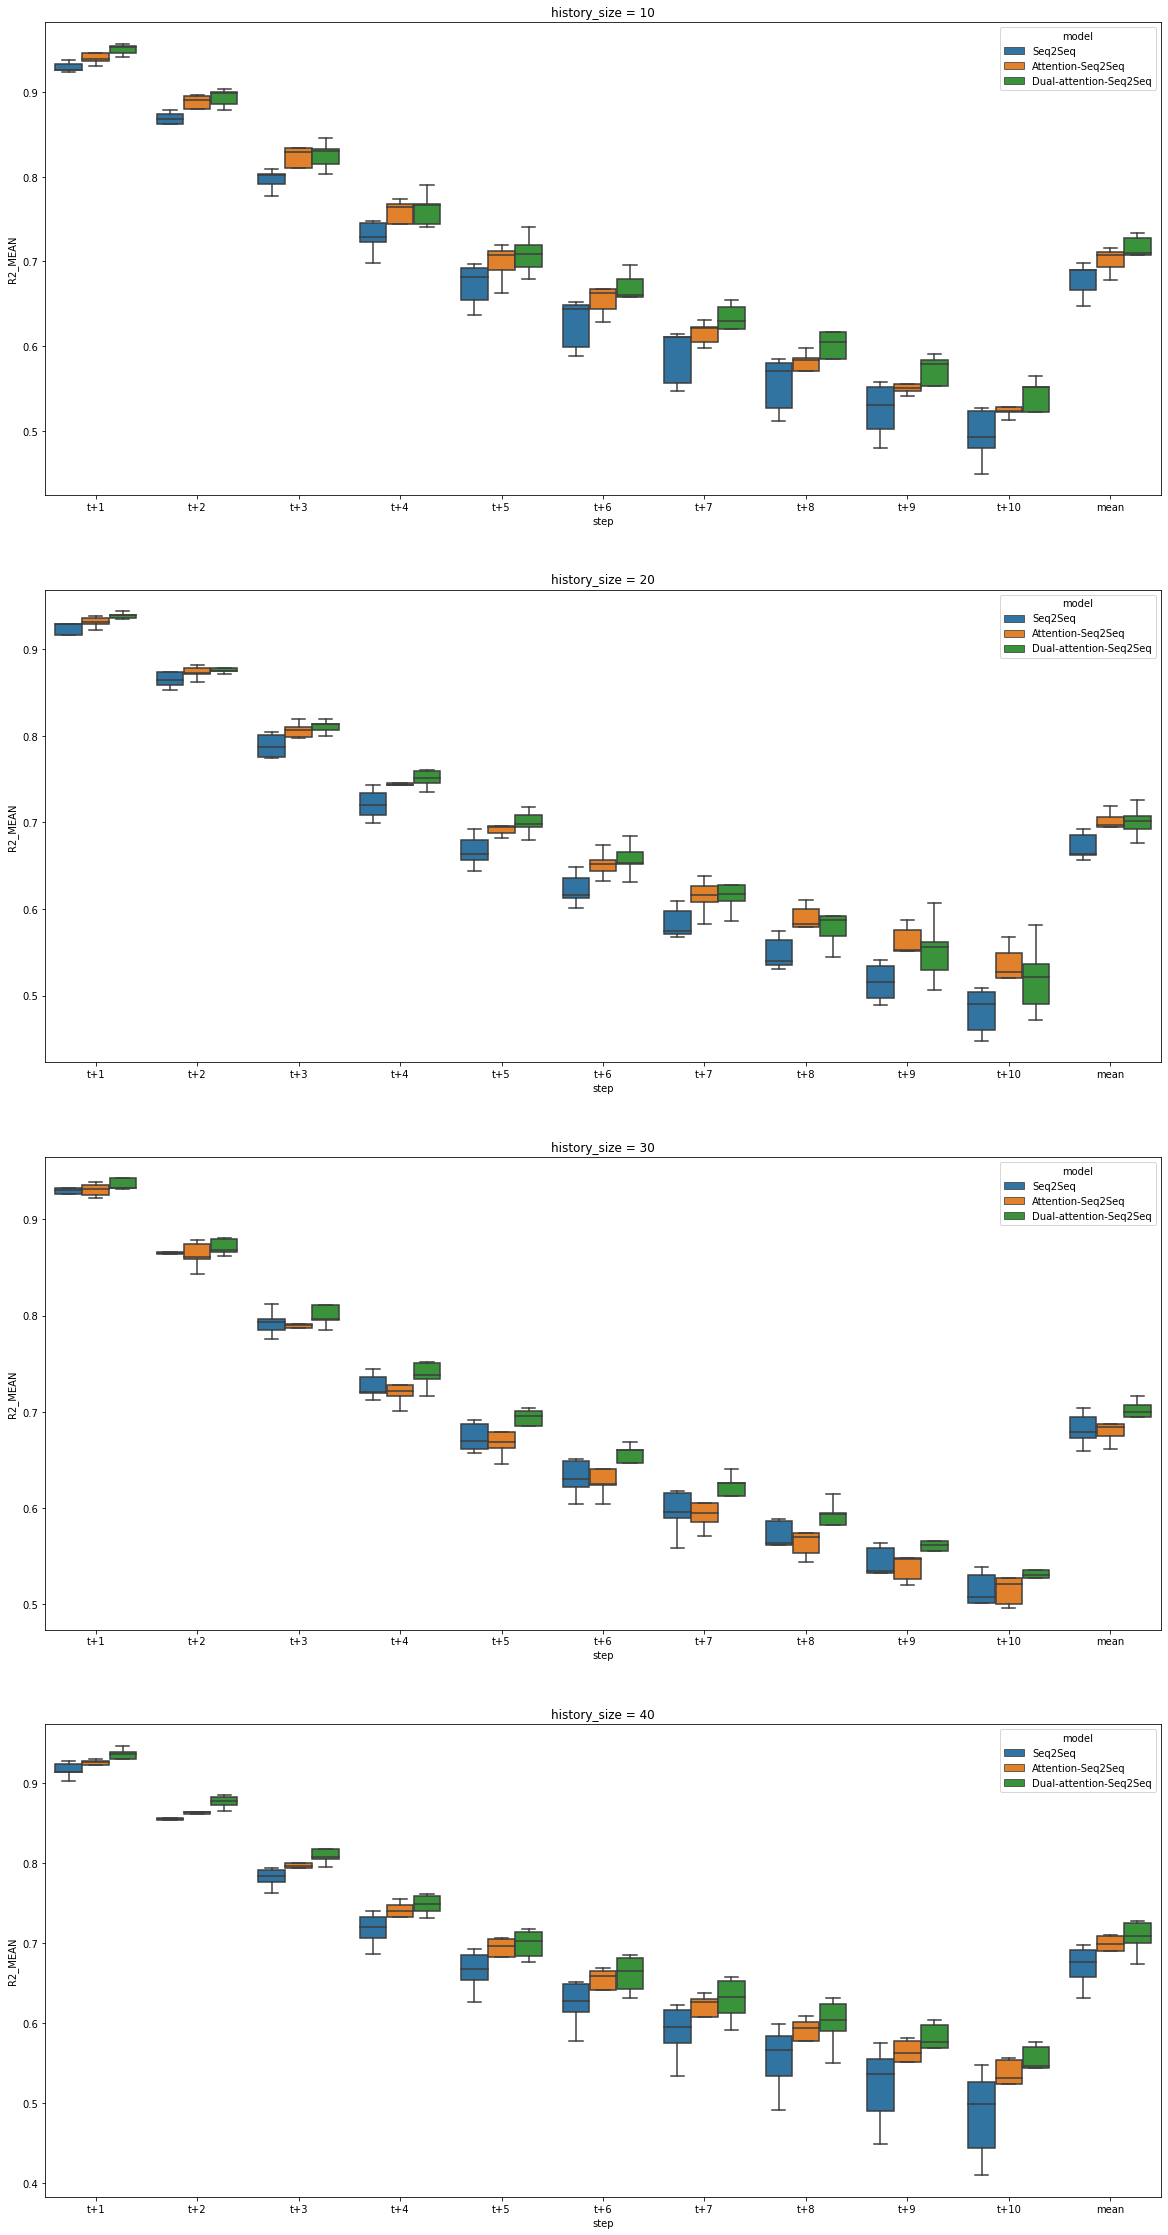

<Figure size 432x288 with 0 Axes>

In [76]:
plot_history = [10, 20, 30, 40]
future_size = 10
data = result_reshape[result_reshape['future']==future_size]
plt.figure(figsize=(future_size*2,len(plot_history)*10))

for i, history_size in enumerate(plot_history):
    plt.subplot(len(plot_history), 1, i+1)
    plot_data = data[data['history']==history_size]
    sns.boxplot(x='step', y='R2_MEAN', hue='model', data=plot_data, notch=False, showfliers = False)
    # plt.ylim(-0.01, 0.3)
    plt.title(f"history_size = {history_size}")
savefile(_, './figure', f'Model_Comparison_For_Future{future_size}_R2', 'figure')
plt.show()
plt.tight_layout()

## future window = 20

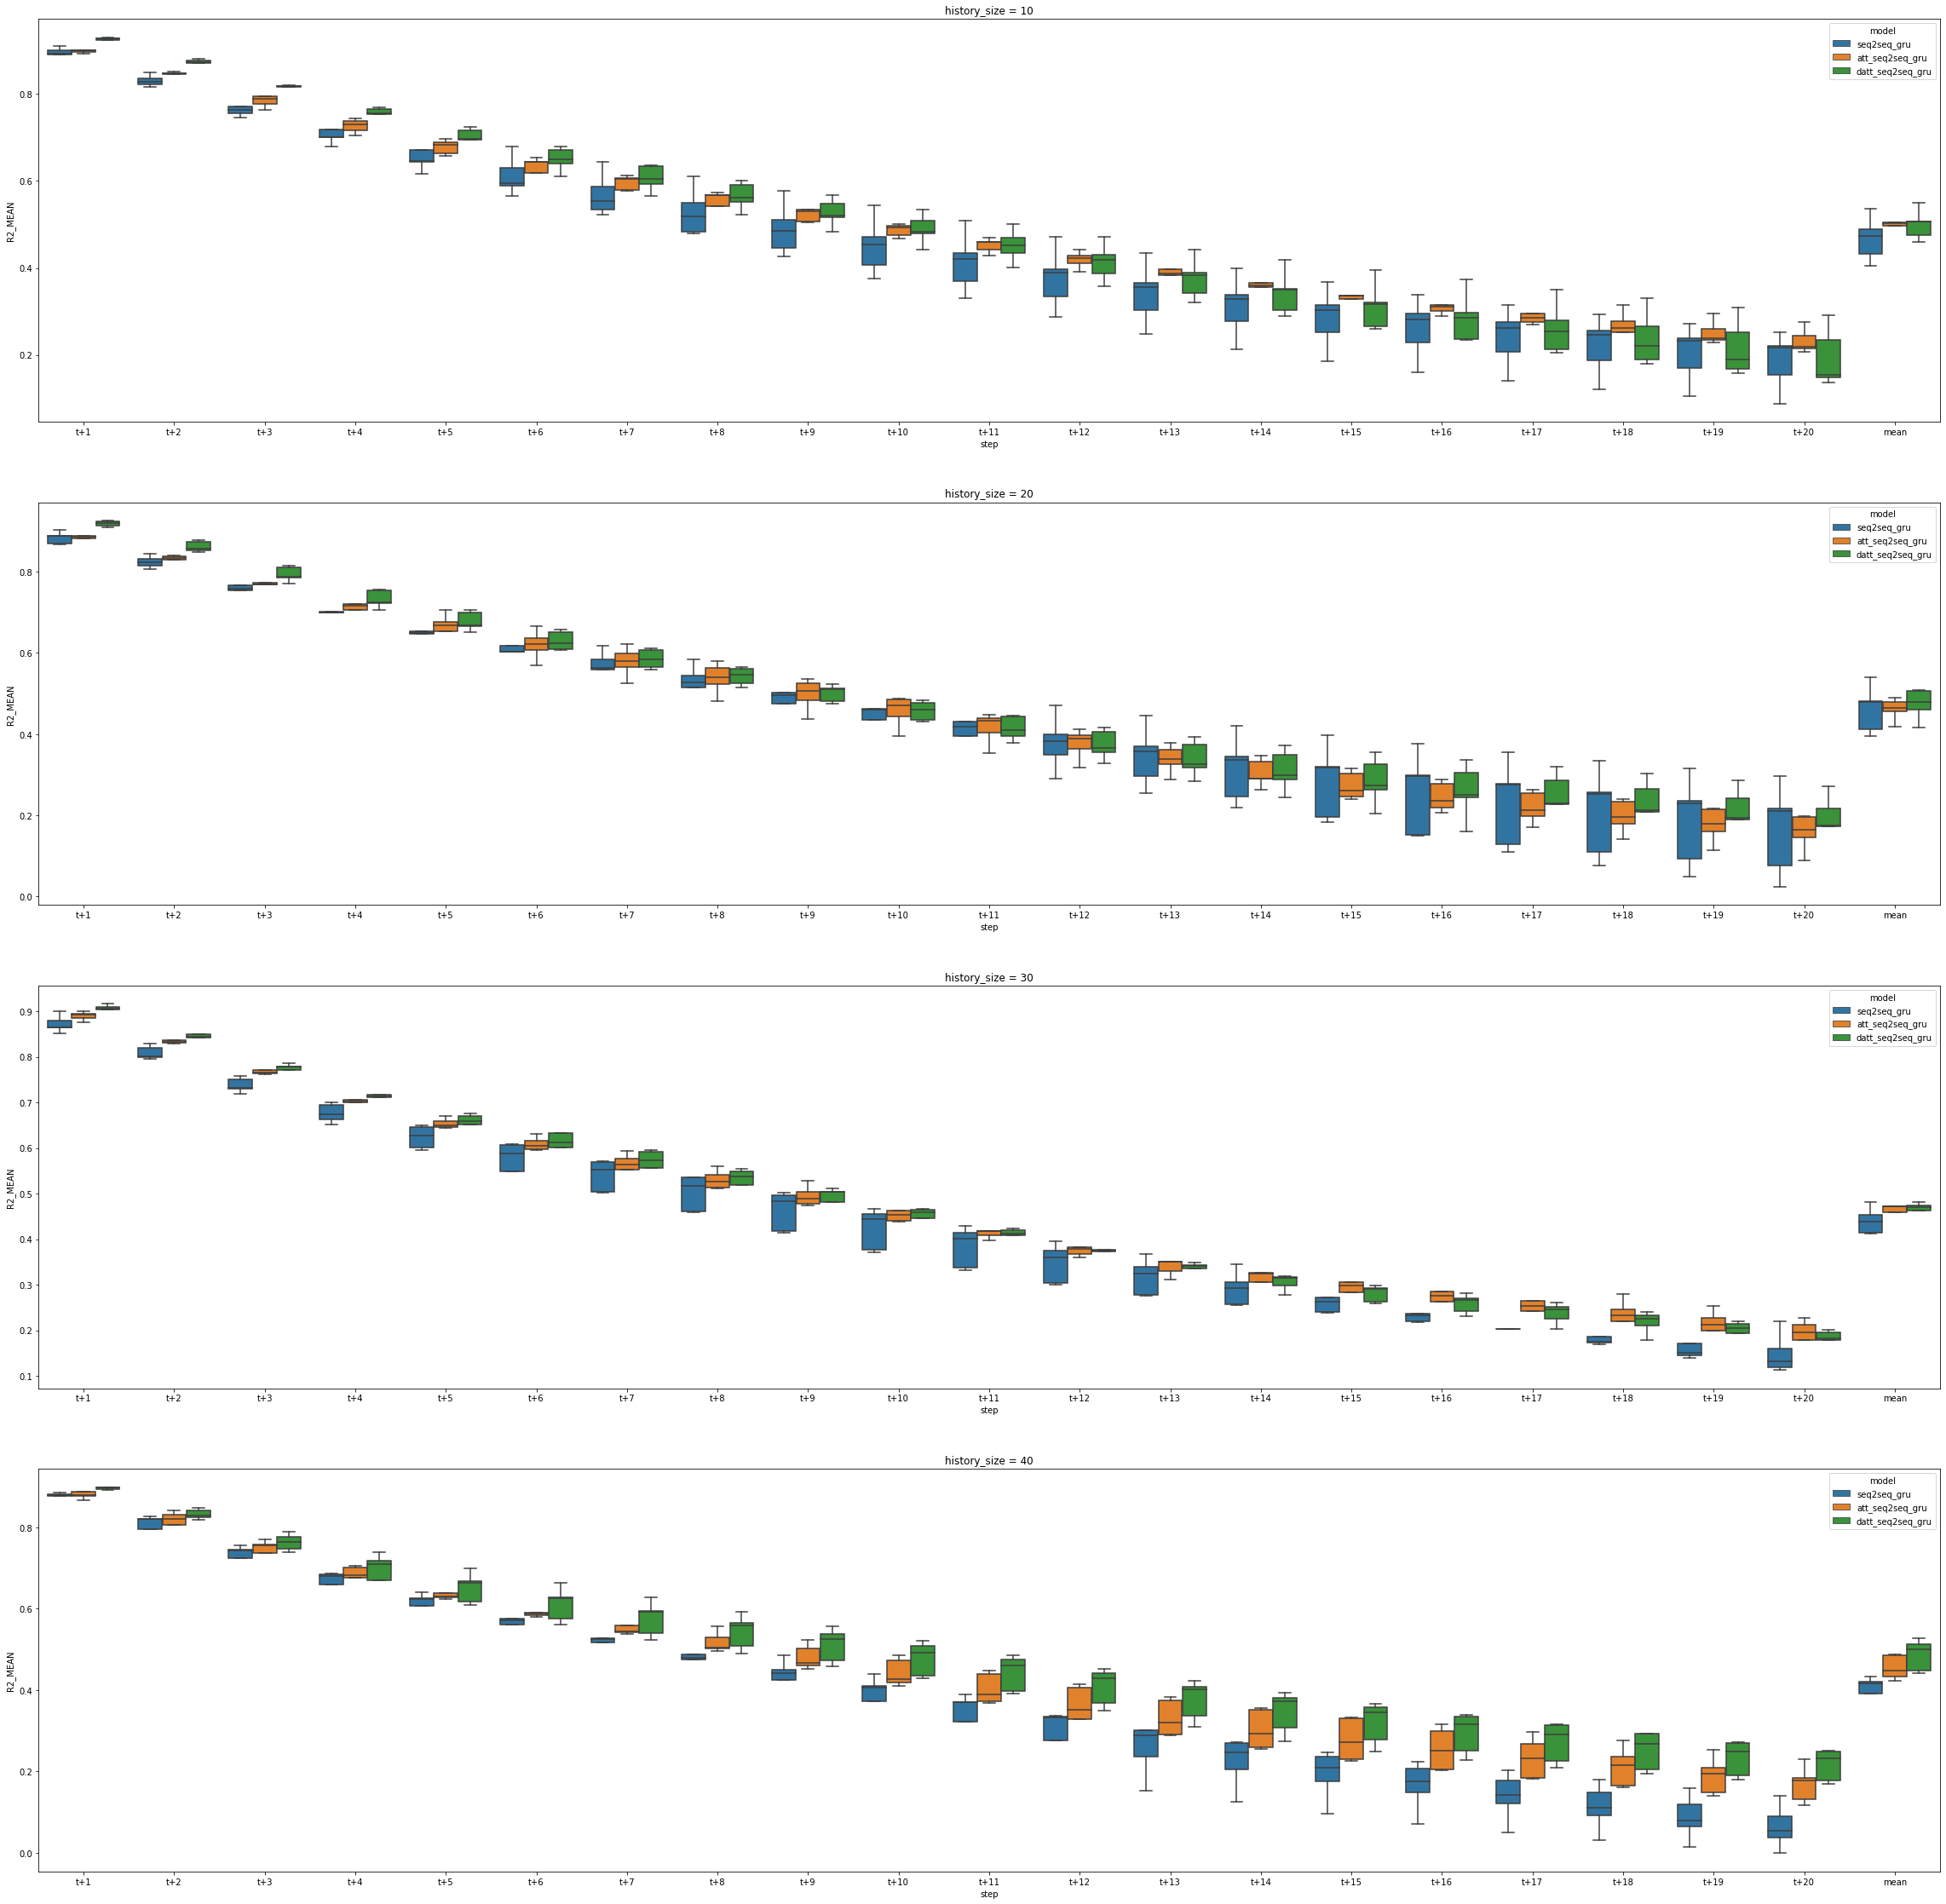

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_history = [10, 20, 30, 40]
future_size = 20
data = result_reshape[result_reshape['future']==future_size]
plt.figure(figsize=(future_size*2,len(plot_history)*10))

for i, history_size in enumerate(plot_history):
    plt.subplot(len(plot_history), 1, i+1)
    plot_data = data[data['history']==history_size]
    sns.boxplot(x='step', y='R2_MEAN', hue='model', data=plot_data, notch=False, showfliers = False)
    # plt.ylim(-0.01, 0.3)
    plt.title(f"history_size = {history_size}")
savefile(_, './figure', f'ModelComparisonForFuture{future_size}', 'figure')
plt.show()
plt.tight_layout()

## future window = 30

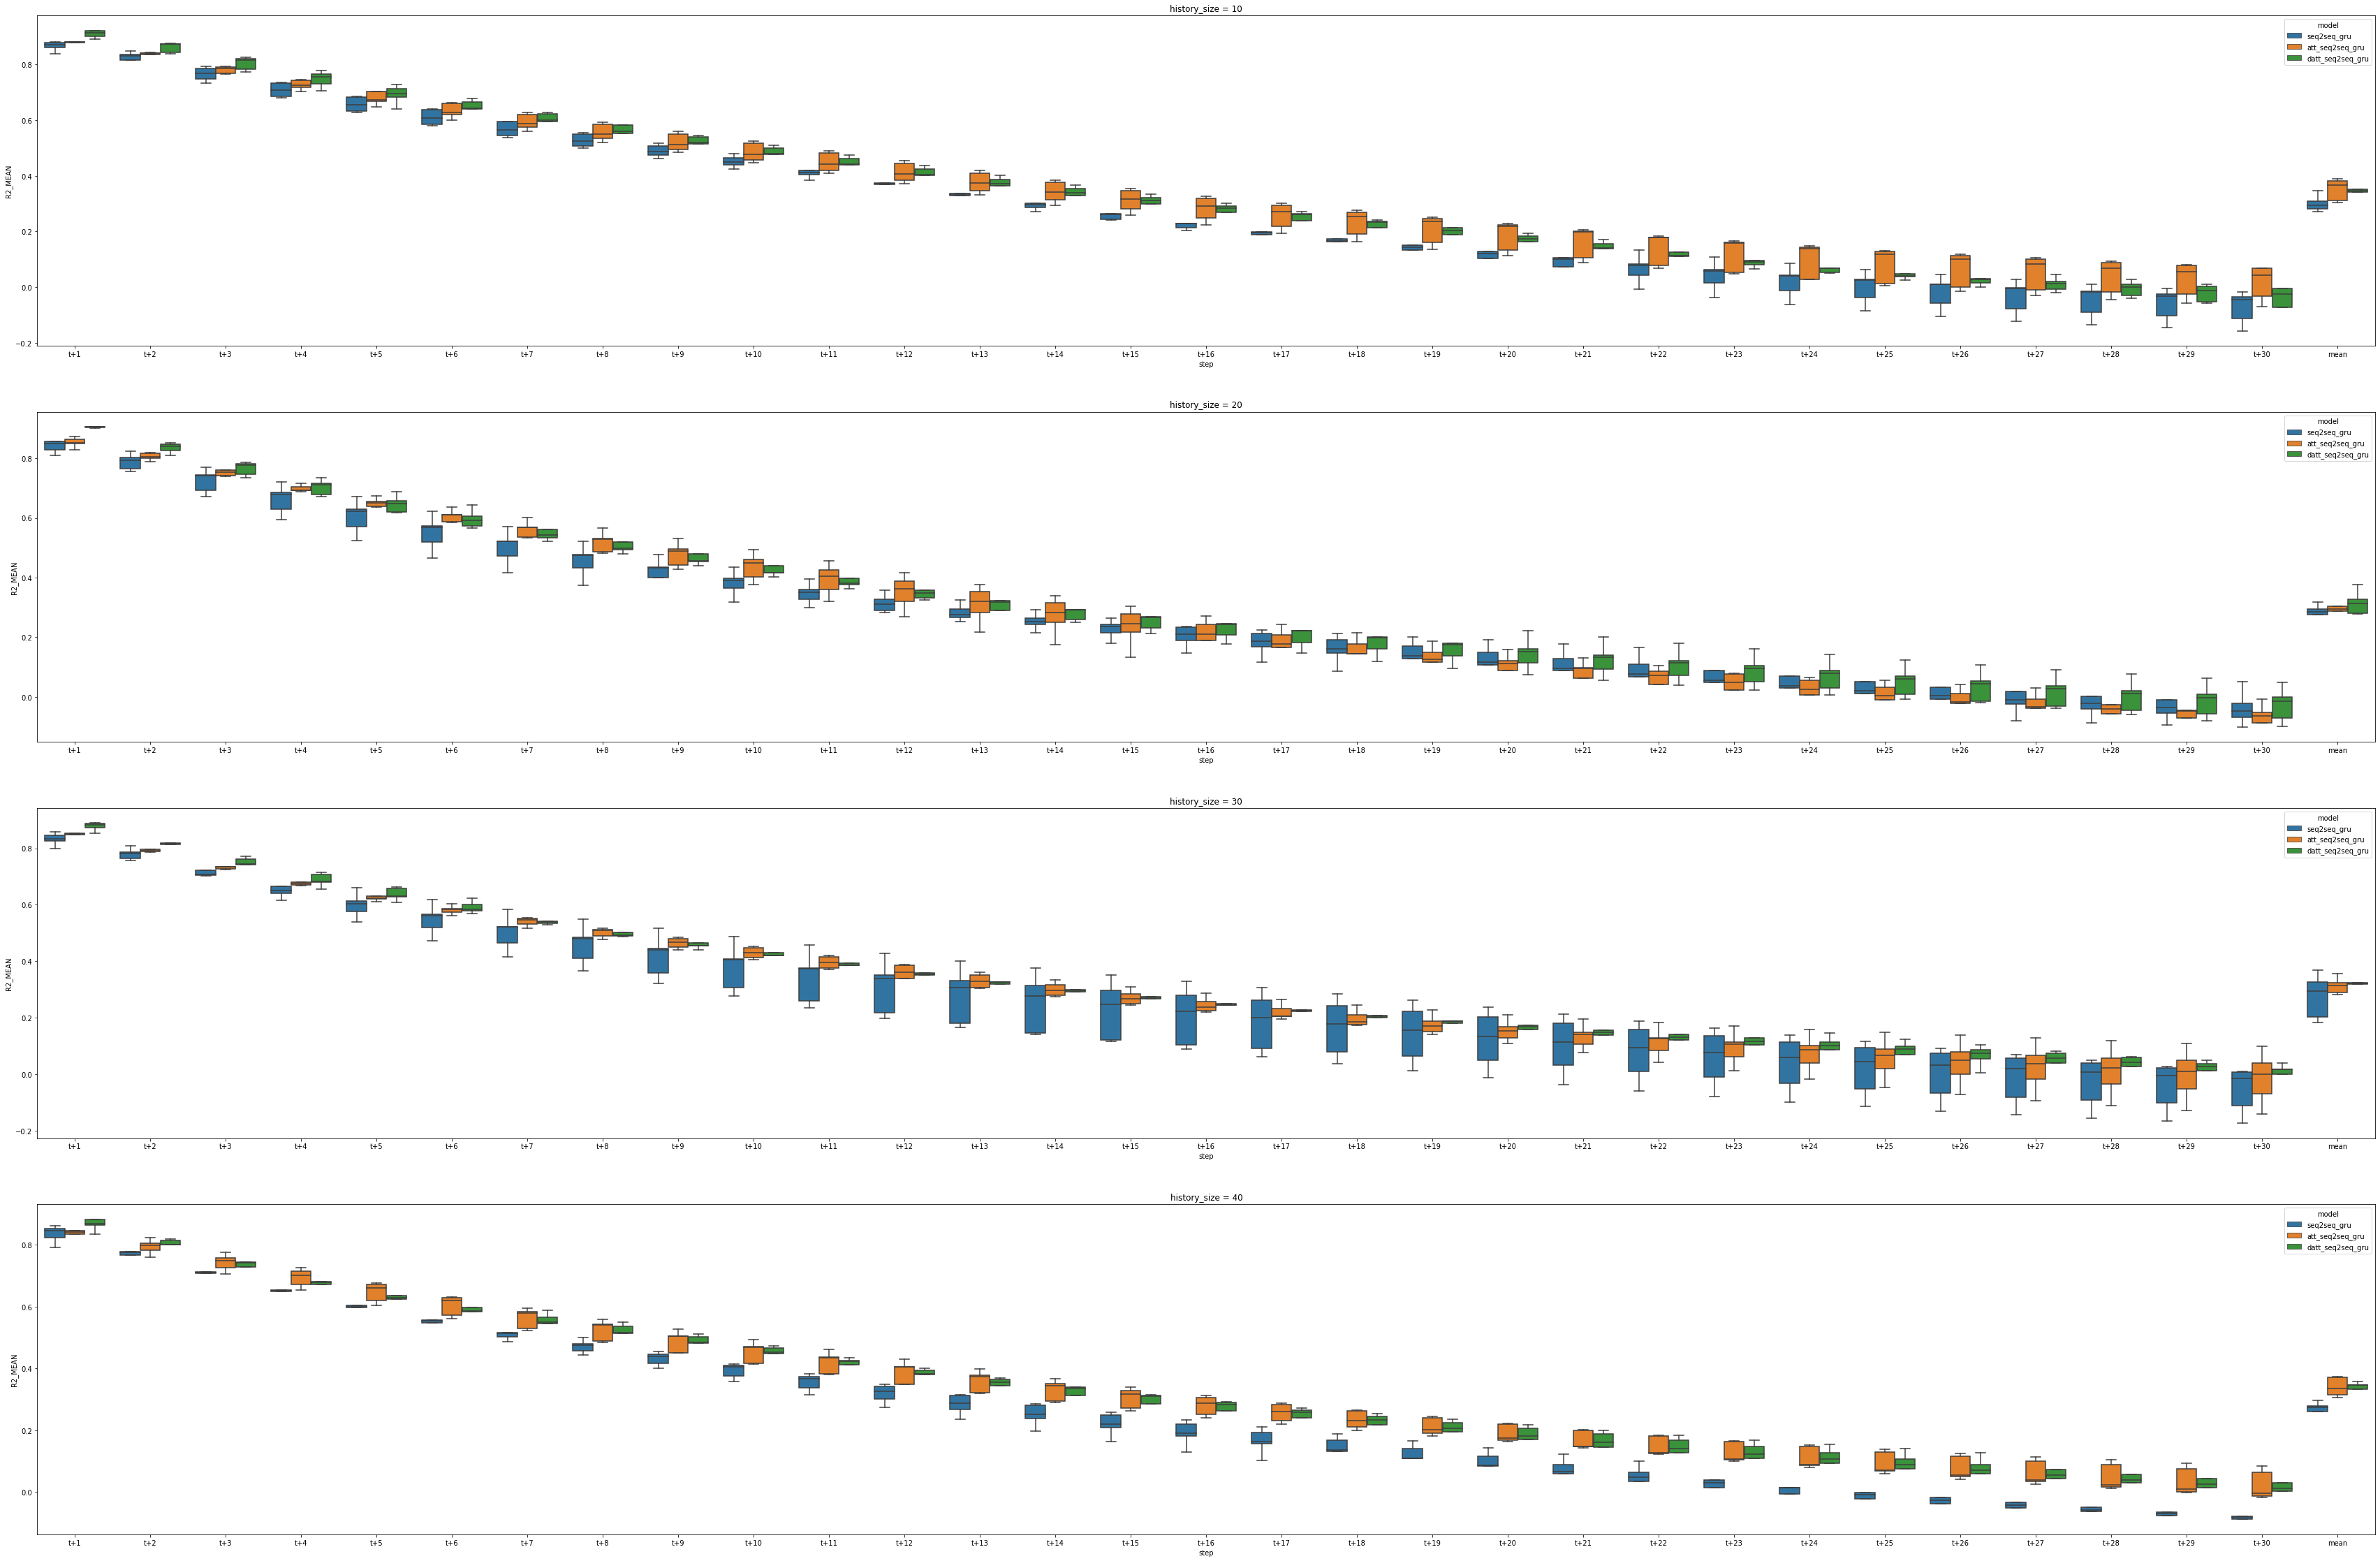

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_history = [10, 20, 30, 40]
future_size = 30
data = result_reshape[result_reshape['future']==future_size]
plt.figure(figsize=(future_size*2,len(plot_history)*10))

for i, history_size in enumerate(plot_history):
    plt.subplot(len(plot_history), 1, i+1)
    plot_data = data[data['history']==history_size]
    sns.boxplot(x='step', y='R2_MEAN', hue='model', data=plot_data, notch=False, showfliers = False)
    # plt.ylim(-0.01, 0.3)
    plt.title(f"history_size = {history_size}")
savefile(_, './figure', f'ModelComparisonForFuture{future_size}', 'figure')
plt.show()
plt.tight_layout()

# History Comparison

## future window = 10

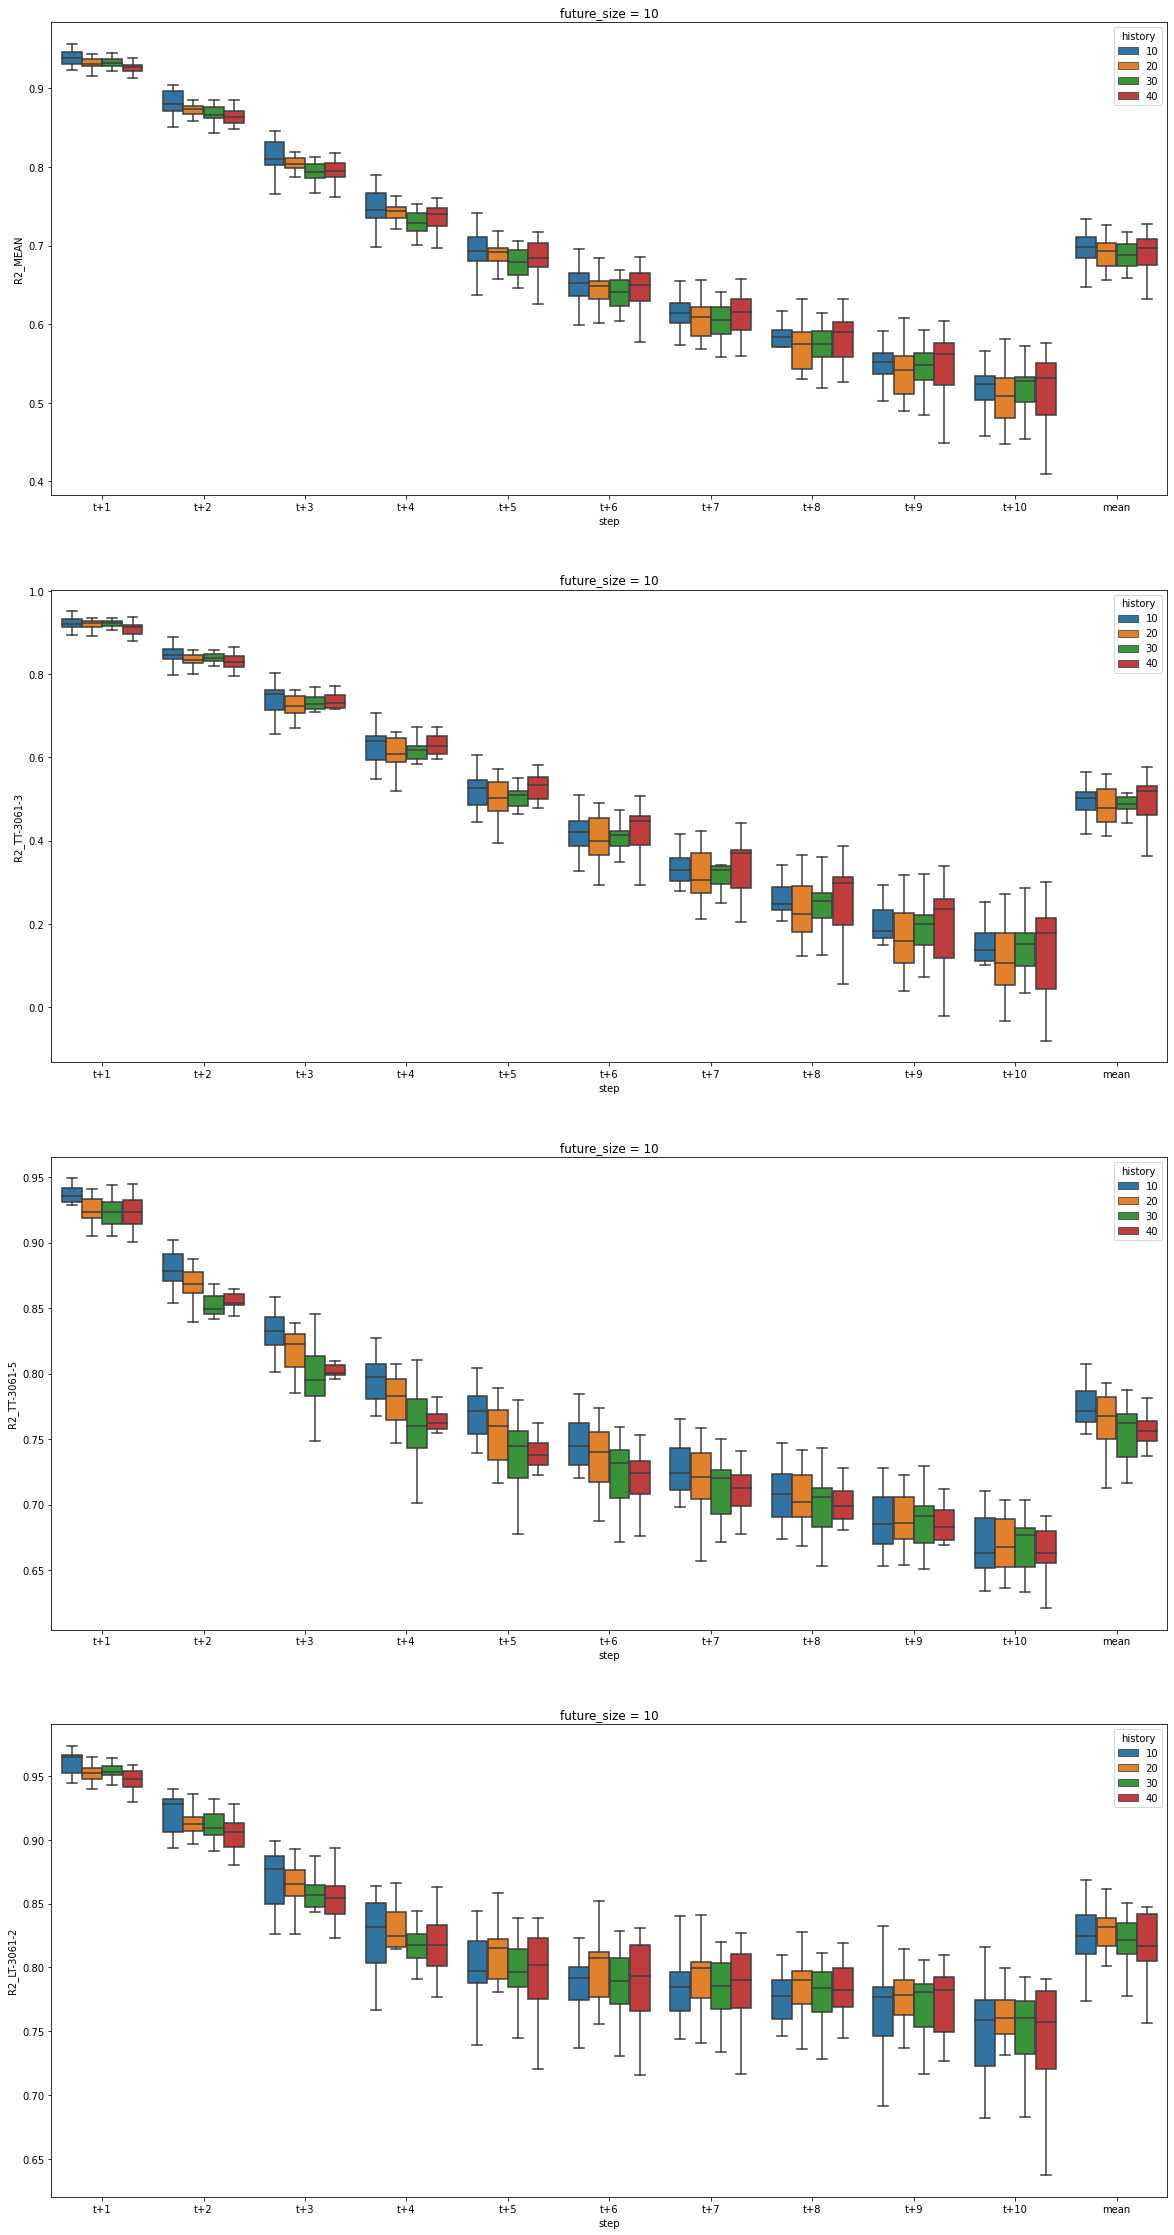

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_var = ['R2_MEAN', 'R2_TT-3061-3', 'R2_TT-3061-5', 'R2_LT-3061-2']
future_size = 10
plt.figure(figsize=(future_size*2,len(plot_var)*10))

for i, var in enumerate(plot_var):
    
    plt.subplot(len(plot_var), 1, i+1)
    plot_data = result_reshape[result_reshape['future']==future_size]
    sns.boxplot(x='step', y=var, hue='history', data=plot_data, notch=False, showfliers = False)
    # plt.ylim(-0.01, 0.3)
    plt.title(f"future_size = {future_size}")
savefile(_, './figure', f'VariableComparisonForFuture{future_size}', 'figure')
plt.show()
plt.tight_layout()

## future window = 20

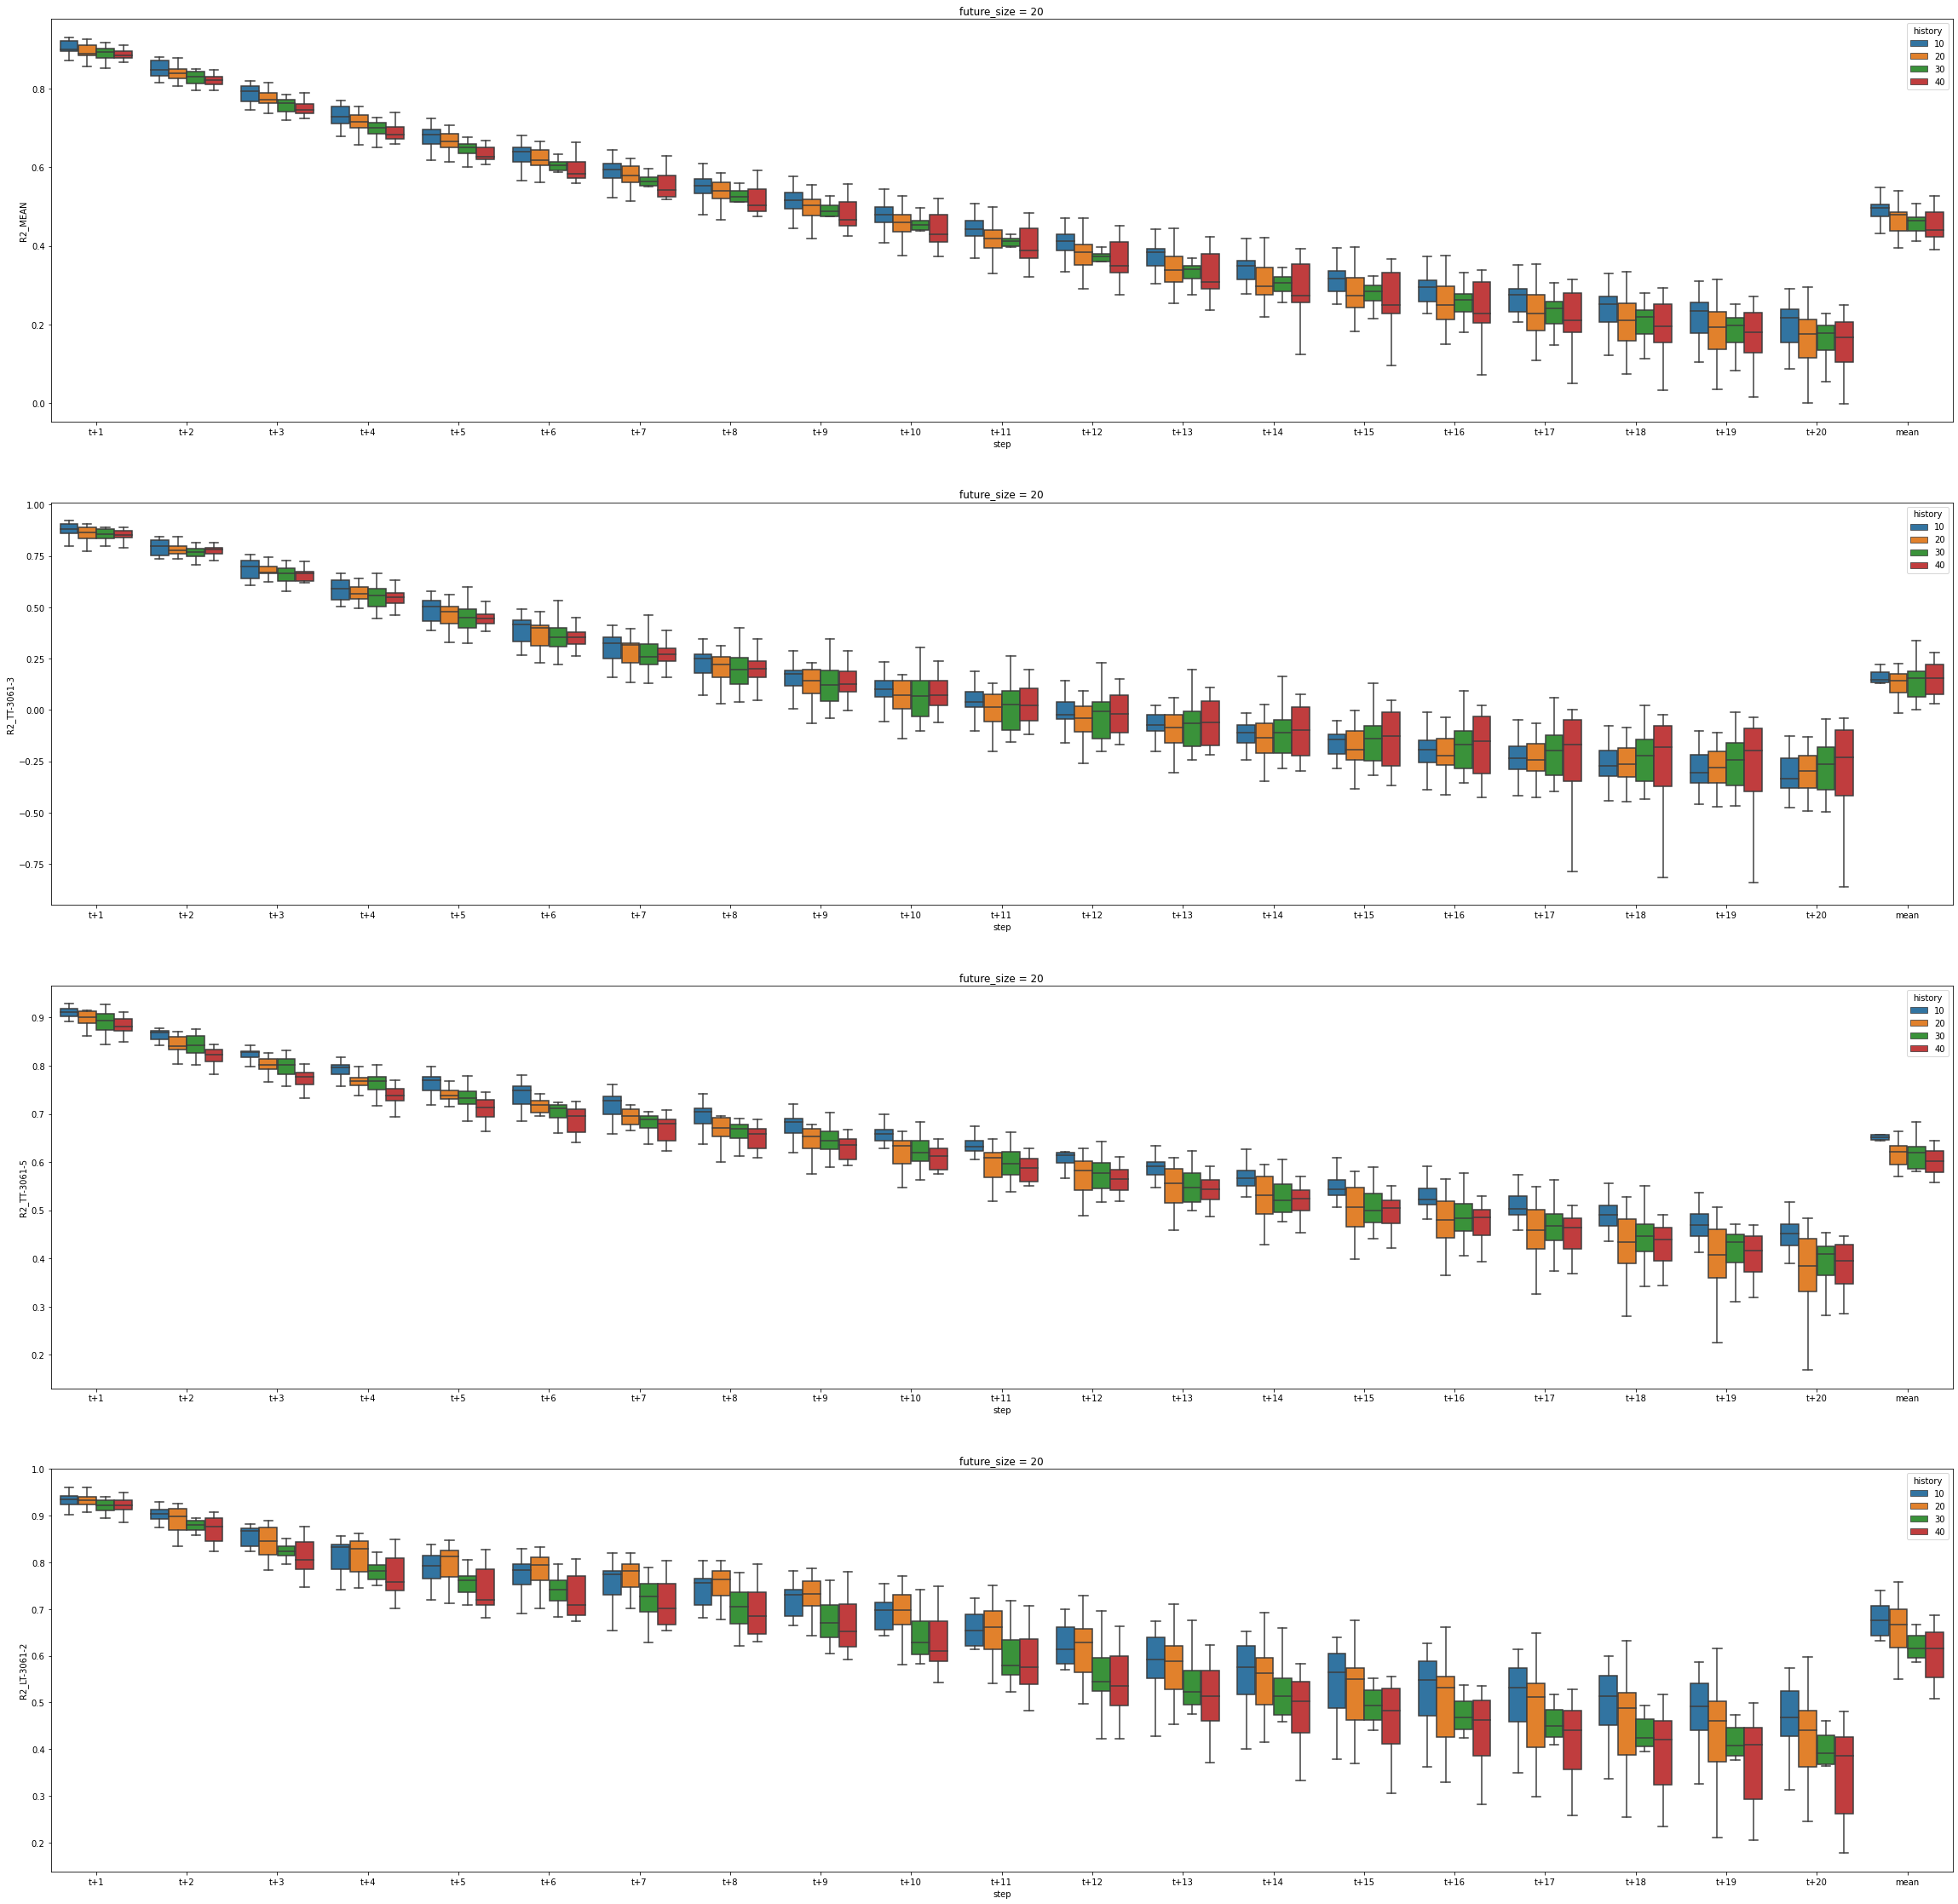

<Figure size 432x288 with 0 Axes>

In [42]:
plot_var = ['R2_MEAN', 'R2_TT-3061-3', 'R2_TT-3061-5', 'R2_LT-3061-2']
future_size = 20
plt.figure(figsize=(future_size*2,len(plot_var)*10))

for i, var in enumerate(plot_var):
    plt.subplot(len(plot_var), 1, i+1)
    plot_data = result_reshape[result_reshape['future']==future_size]
    sns.boxplot(x='step', y=var, hue='history', data=plot_data, notch=False, showfliers = False)
    # plt.ylim(-0.01, 0.3)
    plt.title(f"future_size = {future_size}")
savefile(_, './figure', f'VariableComparisonForFuture{future_size}', 'figure')
plt.show()
plt.tight_layout()

## future window = 30

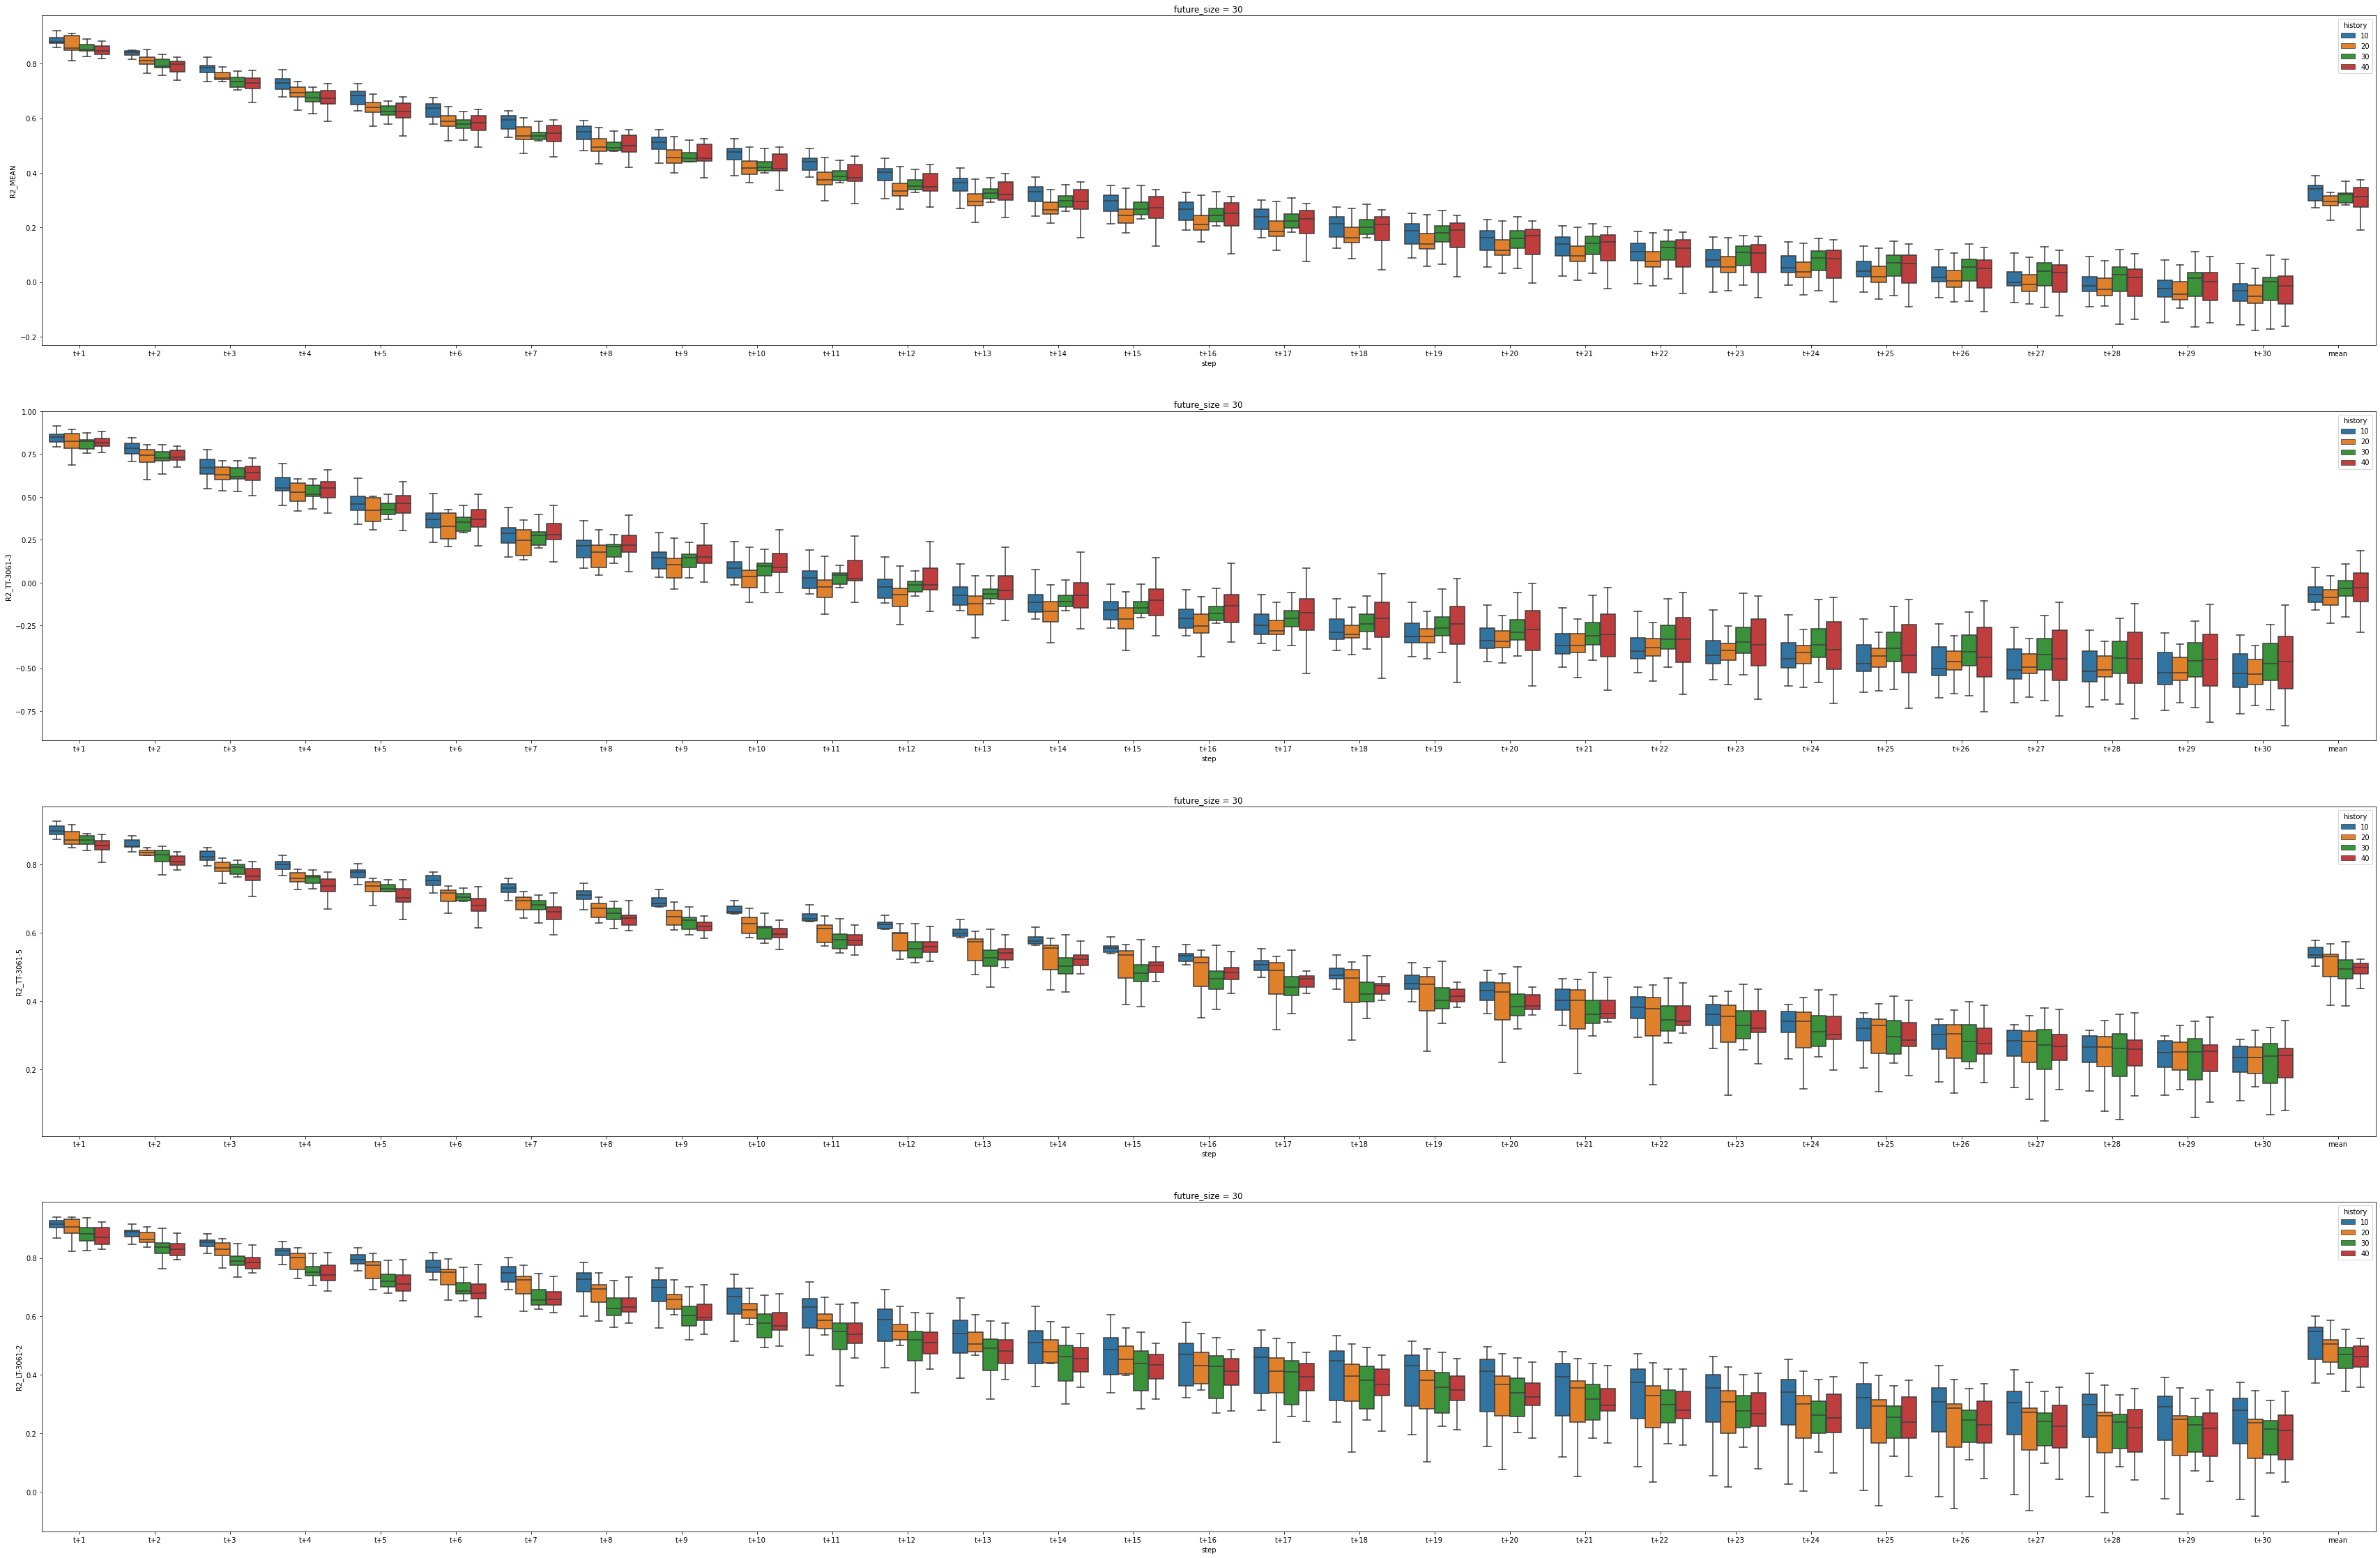

<Figure size 432x288 with 0 Axes>

In [44]:
plot_var = ['R2_MEAN', 'R2_TT-3061-3', 'R2_TT-3061-5', 'R2_LT-3061-2']
future_size = 30
plt.figure(figsize=(future_size*2,len(plot_var)*10))

for i, var in enumerate(plot_var):
    plt.subplot(len(plot_var), 1, i+1)
    plot_data = result_reshape[result_reshape['future']==future_size]
    sns.boxplot(x='step', y=var, hue='history', data=plot_data, notch=False, showfliers = False)
    # plt.ylim(-0.01, 0.3)
    plt.title(f"future_size = {future_size}")
savefile(_, './figure', f'VariableComparisonForFuture{future_size}', 'figure')
plt.show()
plt.tight_layout()

### Figure 1

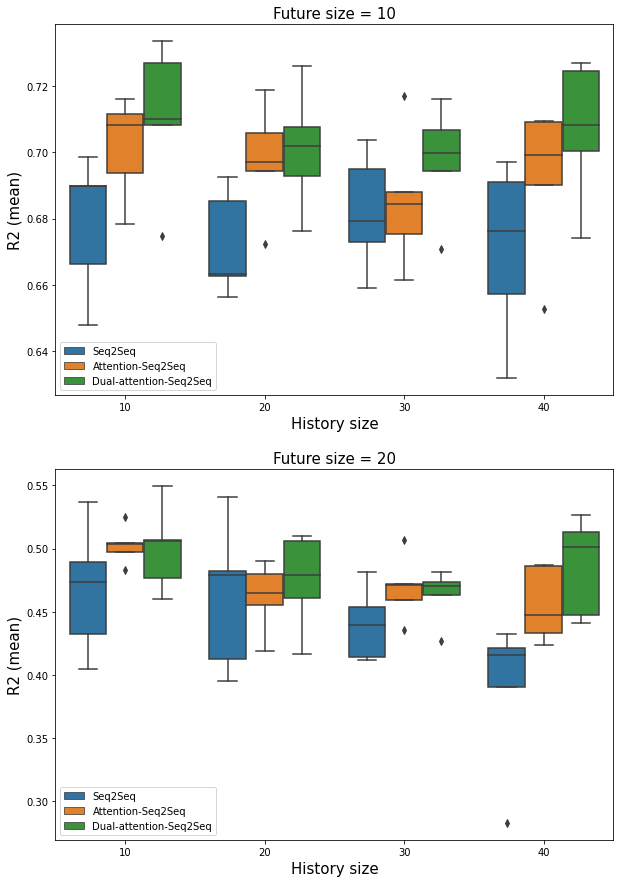

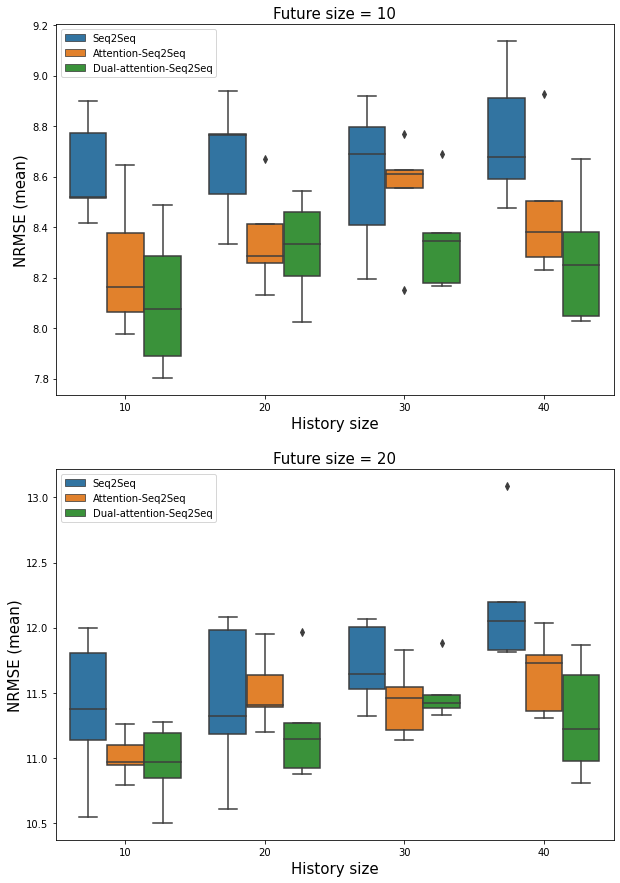

In [102]:
update = True
row_size = 10
column_size = 15

future_list = [10, 20]
data = result_reshape[result_reshape['step']=='mean']

plt.figure(figsize=(row_size,column_size))
for i, future_size in enumerate(future_list):
    plt.subplot(len(future_list), 1, i+1)
    plot_data = data[data['future']==future_size]
    sns.boxplot(x='history', y='R2_MEAN', hue='model', data=plot_data, notch=False, showfliers = True)
    plt.title(f"Future size = {future_size}", fontsize=15)
    plt.xlabel(f"History size", fontsize=15)
    plt.ylabel(f"R2 (mean)", fontsize=15)
    plt.legend(loc='lower left')
    
figure_name = f'figure1_model_comparison_r2'
if not exists(f'./figure/{figure_name}.png') or update:
    savefile(_, './figure', figure_name, 'figure')
    
plt.show()

future_list = [10, 20]
data = result_reshape[result_reshape['step']=='mean']

plt.figure(figsize=(row_size,column_size))
for i, future_size in enumerate(future_list):
    plt.subplot(len(future_list), 1, i+1)
    plot_data = data[data['future']==future_size]
    sns.boxplot(x='history', y='NRMSE_MEAN', hue='model', data=plot_data, notch=False, showfliers = True)
    plt.title(f"Future size = {future_size}", fontsize=15)
    plt.xlabel(f"History size", fontsize=15)
    plt.ylabel(f"NRMSE (mean)", fontsize=15)
    plt.legend(loc='upper left')
    
figure_name = f'figure1_model_comparison_nrmse'
if not exists(f'./figure/{figure_name}.png') or update:
    savefile(_, './figure', figure_name, 'figure')
    
plt.show()

# Attention Comparison

## (40,10)

### setting

In [61]:
target_list = cts_list

# history size and future size
history_size = 40
future_size = 10
step = 1

# variable selection
history_var = process_var
future_var = output_var

history_num = len(history_var)
future_num = len(future_var)

# data to series
history_series = []
future_series = []

for i in range(len(target_list)):
    history, future = data2series(target_list[i], history_size, history_var, future_size, future_var,
                                  step, start_idx=0, end_idx=None)
    if not i:
        history_series = history
        future_series = future
    else:
        history_series = np.concatenate([history_series, history], axis=0)
        future_series = np.concatenate([future_series, future], axis=0)

print(history_series.shape)
print(future_series.shape)

# supervised attention factor 생성
delta = 1
att_type = 'linear'
factor = rnn.super_attention(delta, future_size, future_num, att_type)

# RNN class 생성
DATT_seq2seq_GRU = rnn.RNN(history_series, history_var, future_series, future_var)

# 테스트 데이터 스플릿
test_size = 0.2
test_num = -1
DATT_seq2seq_GRU.train_test(test_size=test_size, test_num=test_num)

# 검증 데이터 스플릿
valid_size = DATT_seq2seq_GRU.history_test.shape[0]/DATT_seq2seq_GRU.history_train.shape[0]
DATT_seq2seq_GRU.train_valid(valid_size=valid_size)

# 데이터 스케일링
DATT_seq2seq_GRU.scaling()

# 모델 구성
num_layers = 1
num_neurons = 50
dense_layers = 1
dense_neurons = 50
model_type = 'datt_seq2seq_gru'
DATT_seq2seq_GRU.build_model(num_layers=num_layers, num_neurons=num_neurons, dense_layers=dense_layers, dense_neurons=dense_neurons, model_type=model_type, factor=factor)
print(DATT_seq2seq_GRU.model.summary())

(30244, 40, 7)
(30244, 10, 3)
Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 40, 7)]      0           []                               
                                                                                                  
 encoder (GRU)                  [(None, 40, 50),     8850        ['input_5[0][0]']                
                                 (None, 50)]                                                      
                                                                                                  
 repeat_vector_4 (RepeatVector)  (None, 10, 50)      0           ['encoder[0][1]']                
                                                                                                  
 decoder (GRU)                  (None, 10, 50)       15300   

### result

,TT-3061-3,TT-3061-5,LT-3061-2,mean,TT-3061-3,TT-3061-5,LT-3061-2,mean
index,R2,R2,R2,R2,nRMSE,nRMSE,nRMSE,nRMSE
0,0.922711,0.945183,0.94014,0.936011,4.511562,4.120905,3.766968,4.133145
1,0.85851,0.882018,0.906398,0.882309,6.066606,6.046251,4.711096,5.607984
2,0.765232,0.817254,0.870926,0.817804,7.708989,7.525577,5.533003,6.922523
3,0.668536,0.770027,0.844637,0.761067,9.038533,8.443389,6.071107,7.85101
4,0.581165,0.743172,0.828362,0.717566,10.059844,8.923934,6.381611,8.455129
5,0.506554,0.727401,0.821181,0.685045,10.812572,9.19478,6.514445,8.840599
6,0.442219,0.713797,0.817852,0.657956,11.385141,9.421323,6.575975,9.12748
7,0.386197,0.697133,0.811628,0.631653,11.914285,9.690995,6.689306,9.431529
8,0.337786,0.676677,0.79844,0.604301,12.389693,10.011777,6.921707,9.774392


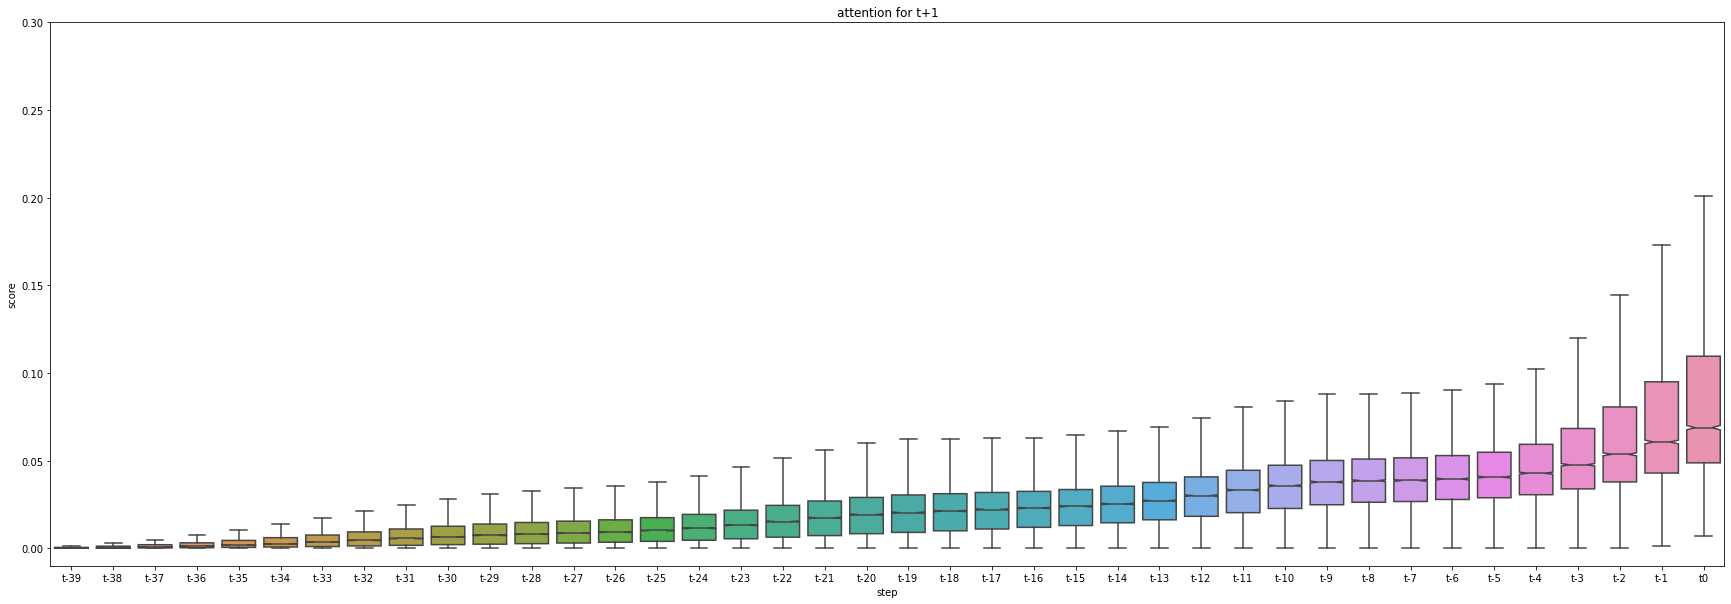

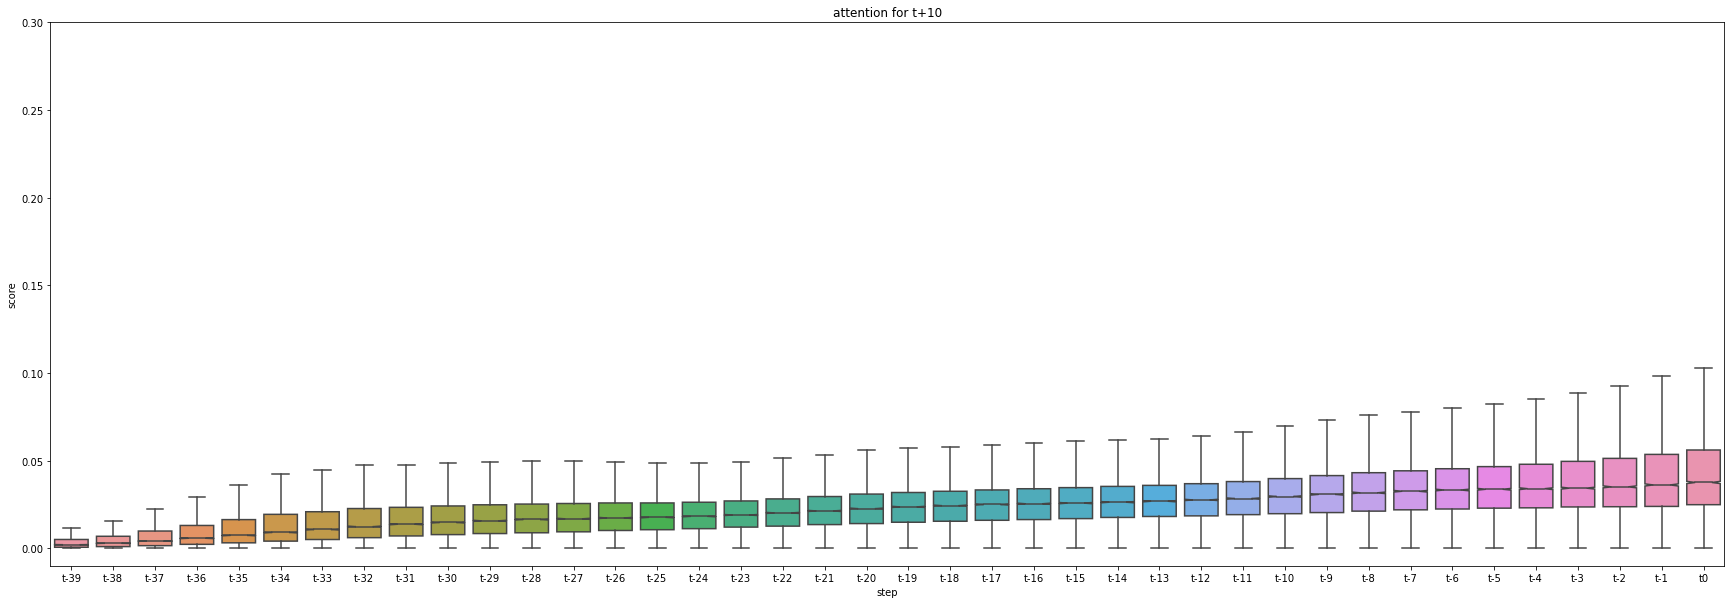

In [62]:
# selec model number
model_num = 1
model_name = f"{history_size}_{future_size}_{num_layers}_{num_neurons}_{dense_layers}_{dense_neurons}_{model_type}_{model_num}"
DATT_seq2seq_GRU.model.load_weights(f"./model/{model_name}.h5")

_ = DATT_seq2seq_GRU.test()

attention = DATT_seq2seq_GRU.get_attention(DATT_seq2seq_GRU.history_test_sc)
plot_steps = [0,9]

for future_step in plot_steps:
    attention_step = pd.DataFrame(attention[:,future_step,:], columns=[f't{i-history_size+1}' for i in range(history_size)])

    for i in range(history_size):
        history_step = i-history_size+1
        if not i:
            attention_reshape = attention_step[[f't{history_step}']].copy()
            attention_reshape.columns = ['score']
            attention_reshape['step'] = f't{history_step}'
        else:
            temp = attention_step[[f't{history_step}']].copy()
            temp.columns = ['score']
            temp['step'] = f't{history_step}'        
            attention_reshape = pd.concat([attention_reshape, temp], axis=0)
        attention_reshape.reset_index(drop=True, inplace=True)

    plt.figure(figsize=(30,10))
    sns.boxplot(x='step', y='score', data=attention_reshape, notch=True, showfliers = False)
    plt.ylim(-0.01, 0.3)
    plt.title(f"attention for t+{future_step+1}")
    savefile(_, './figure', f'AttentionScore_history{history_size}future{future_size}_step{future_step}', 'figure')
    plt.show()

### prediction plot

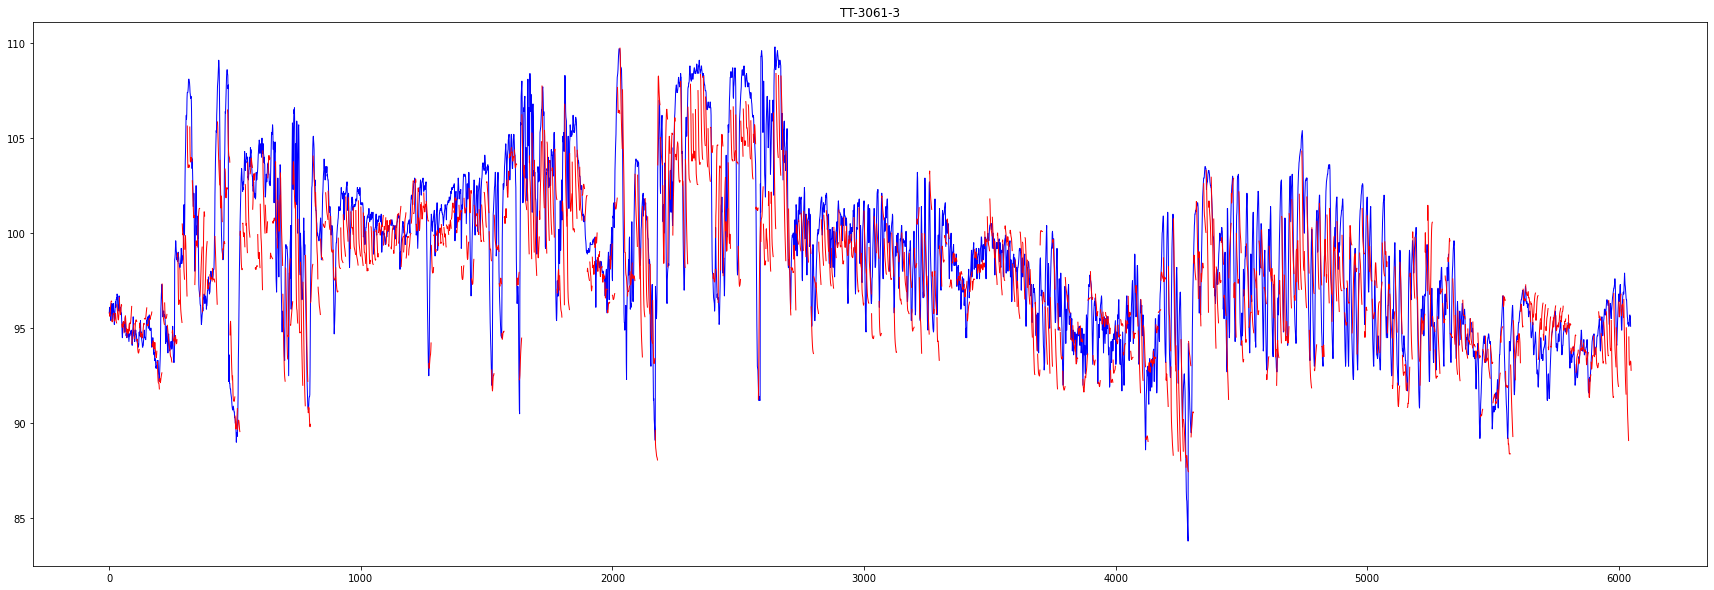

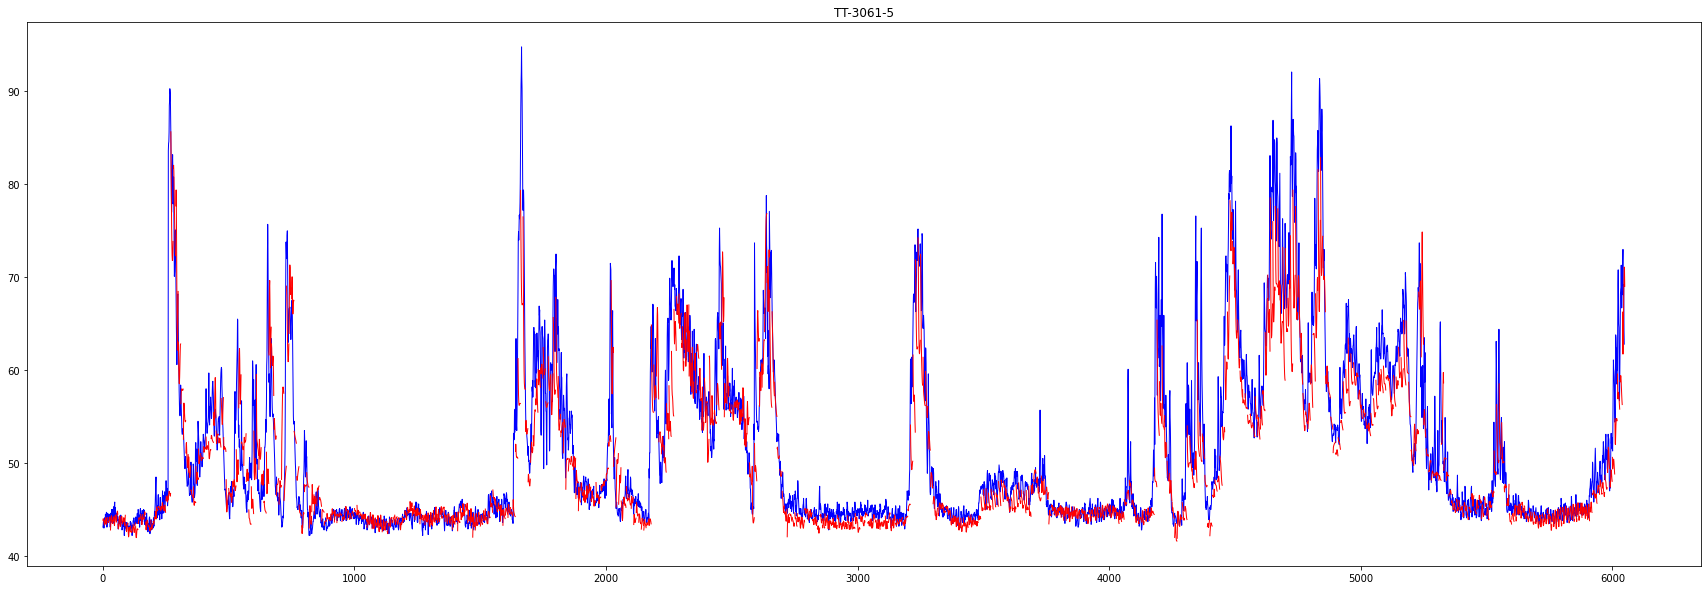

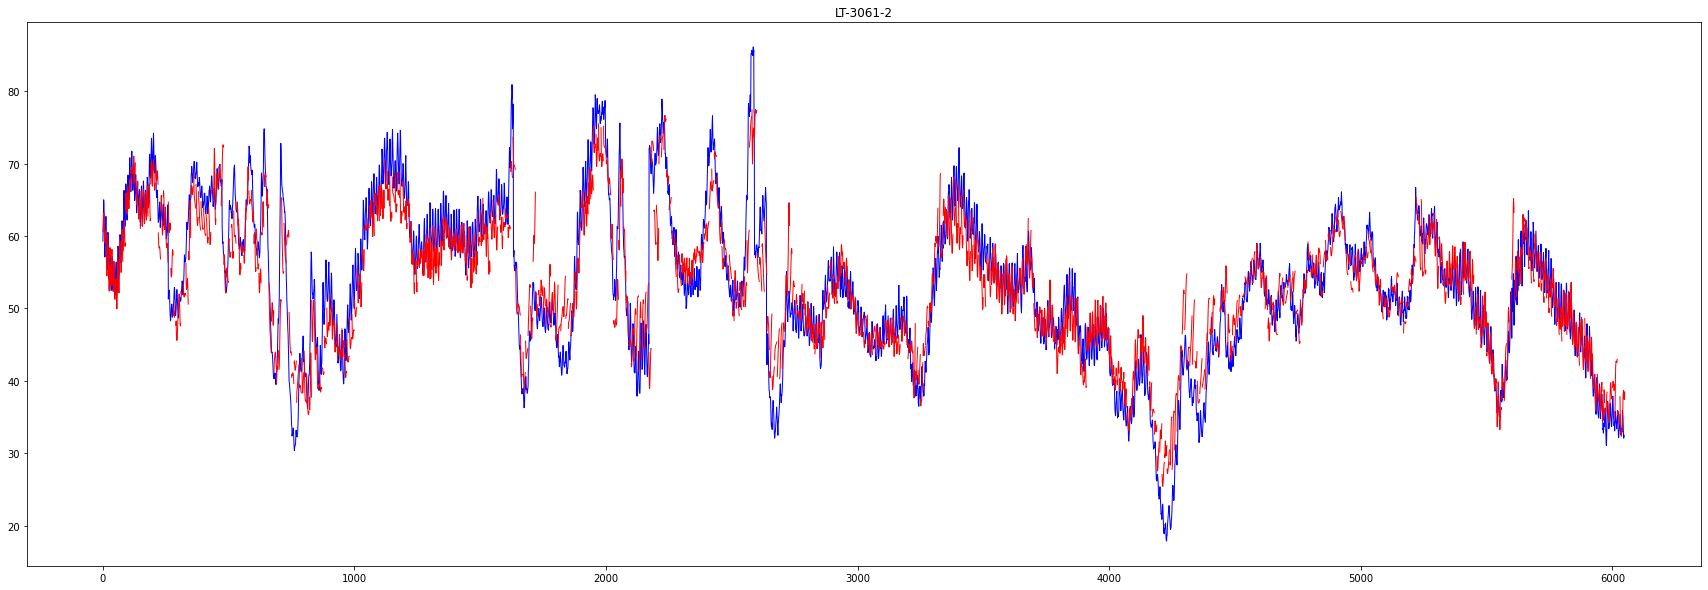

In [63]:
for var_num in range(len(future_var)):
    predict_wt = DATT_seq2seq_GRU.model.predict(DATT_seq2seq_GRU.history_test_sc)
    predict_sc = predict_wt/DATT_seq2seq_GRU.factor
    actual_sc = DATT_seq2seq_GRU.future_test_sc
    _, predict = DATT_seq2seq_GRU.unscaling(DATT_seq2seq_GRU.history_test_sc, predict_sc)
    _, actual = DATT_seq2seq_GRU.unscaling(DATT_seq2seq_GRU.history_test_sc, actual_sc)

    plt.figure(figsize=(30,10))
    plt.plot(np.arange(0,len(actual)), actual[:,0,var_num], label='actual', linewidth=1, color='b')

    for start_idx in range(0, len(predict), future_size):
        end_idx = start_idx + future_size
        predict_plot = predict[start_idx, :, var_num]
        plt.plot(np.arange(start_idx, start_idx + len(predict_plot)), predict_plot, label='prediction', linewidth=1, color='r')
    plt.title(f'{future_var[var_num]}')
    savefile(_, './figure', f'PredictionPlot_history{history_size}future{future_size}_{future_var[var_num]}', 'figure')
    plt.show()

### select model number


model 1


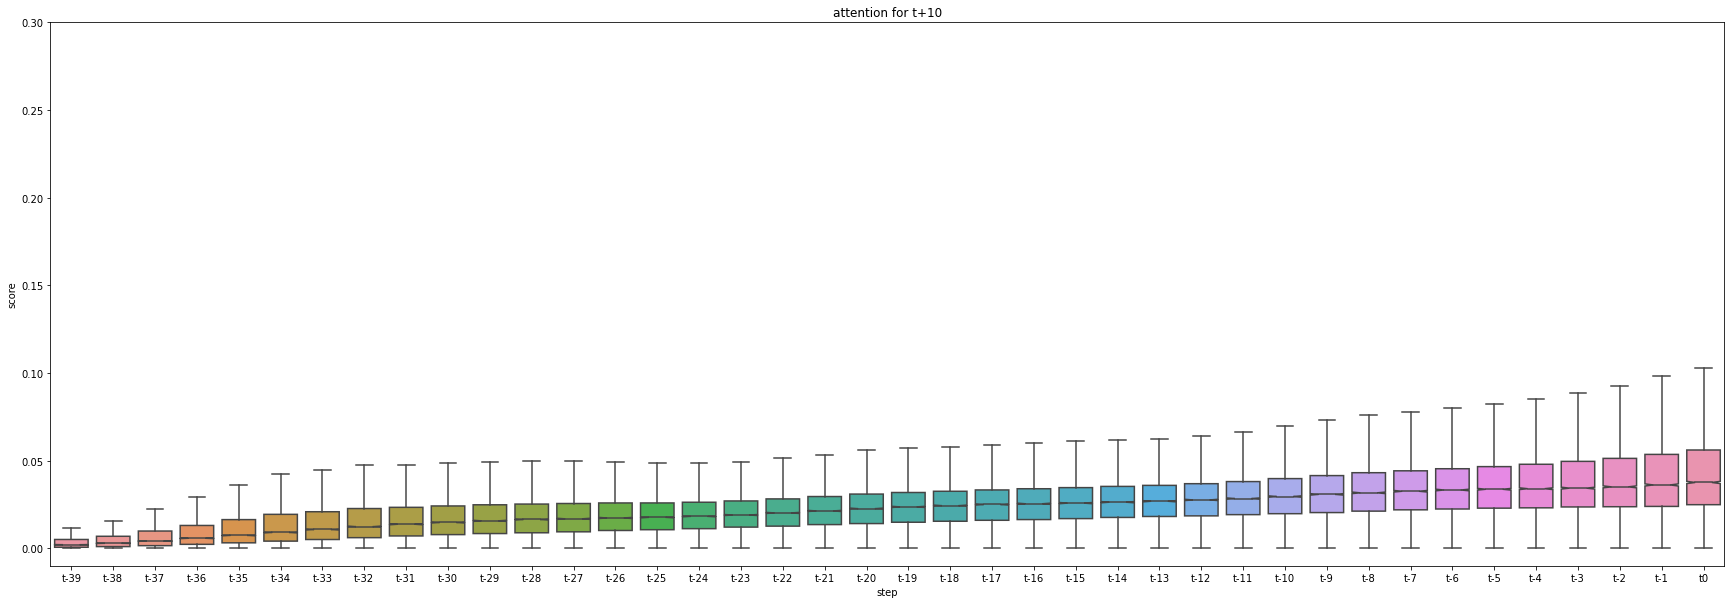

model 2


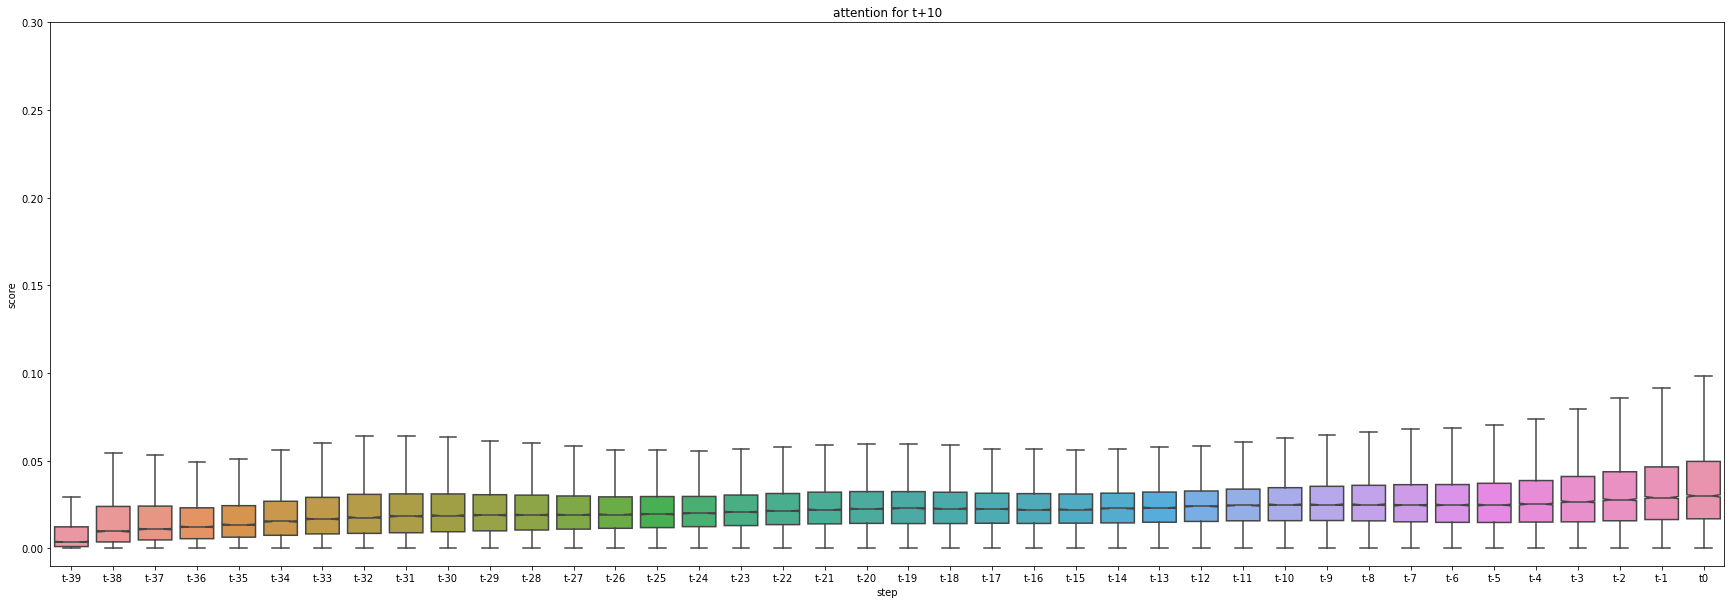

model 3


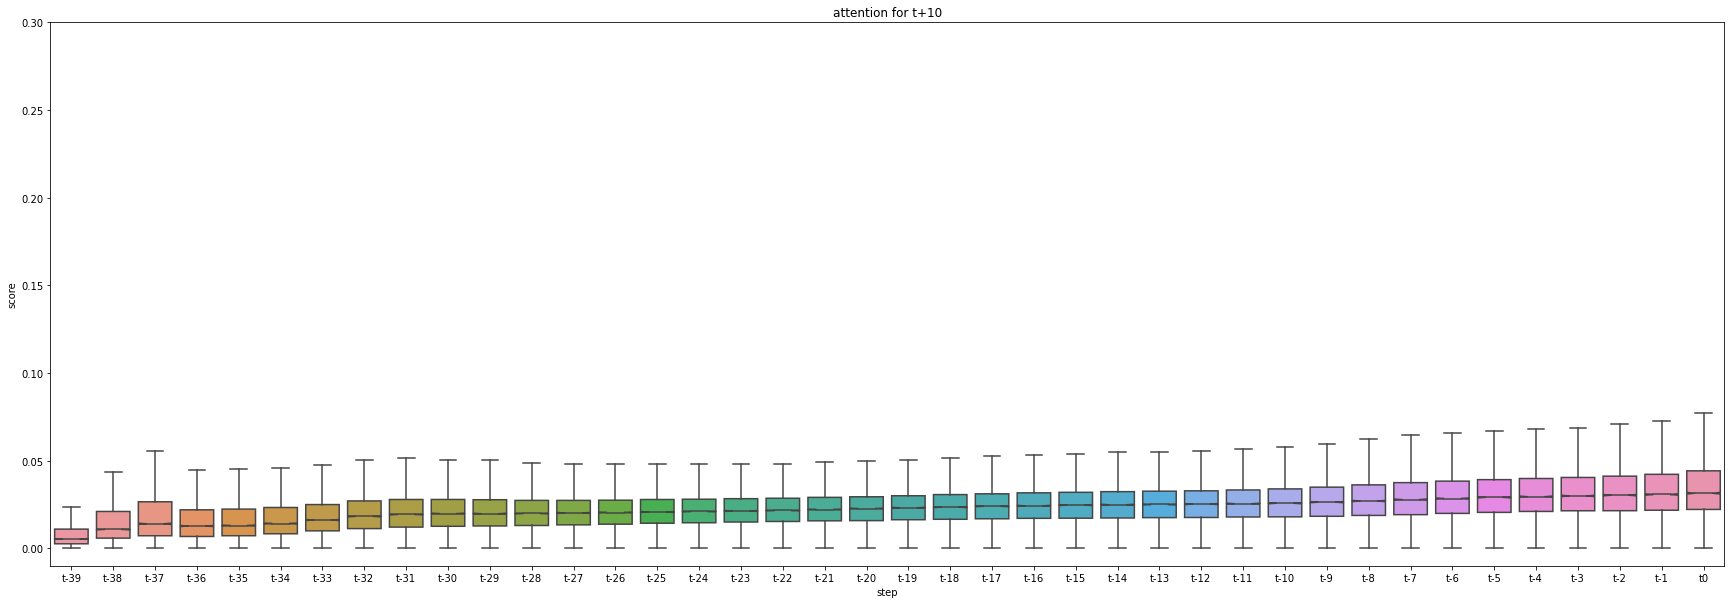

model 4


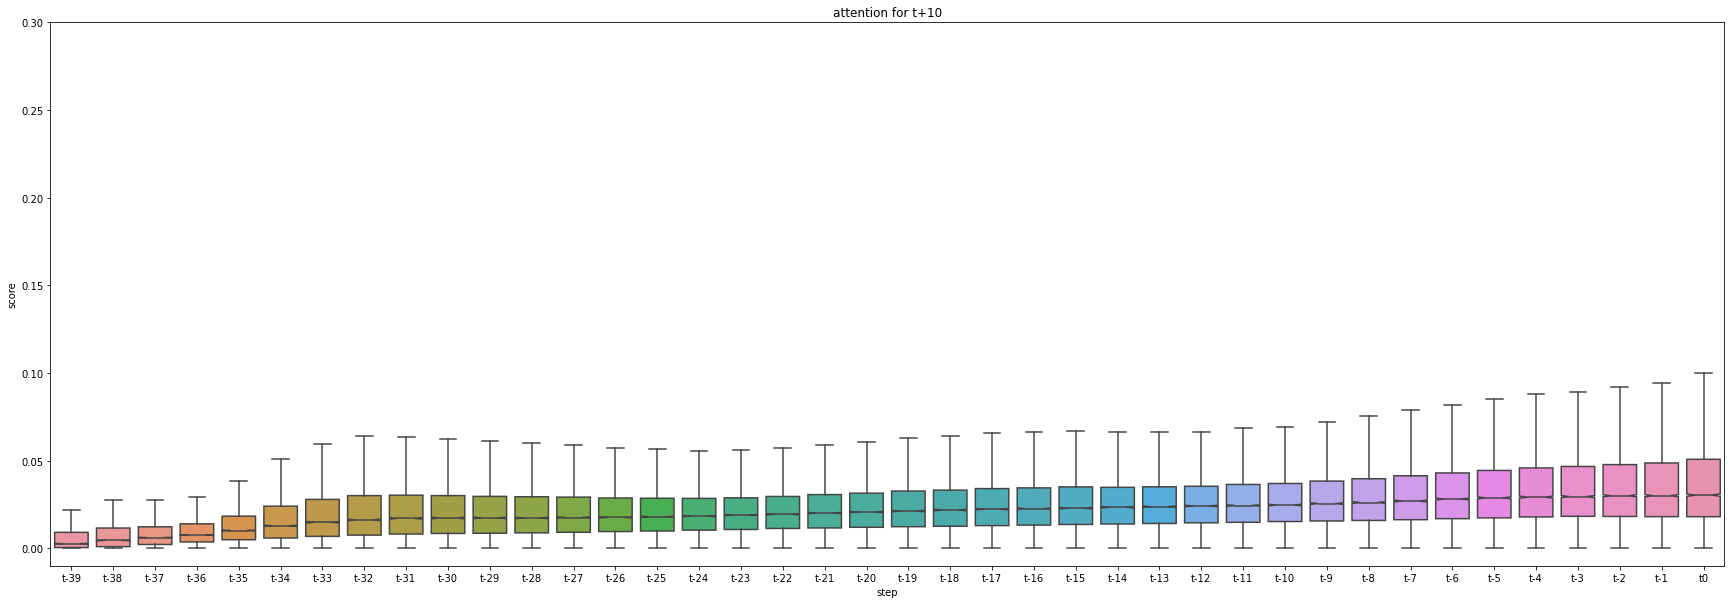

model 5


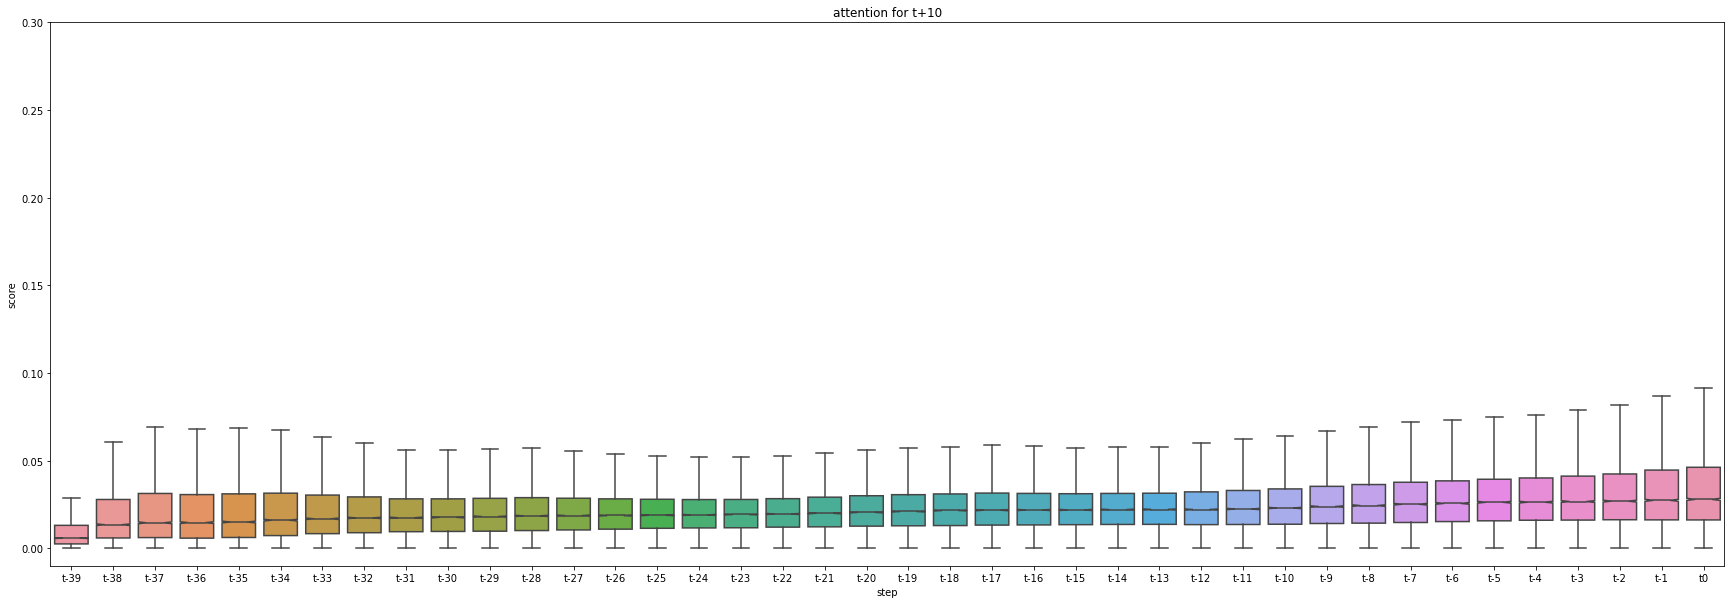

model 6


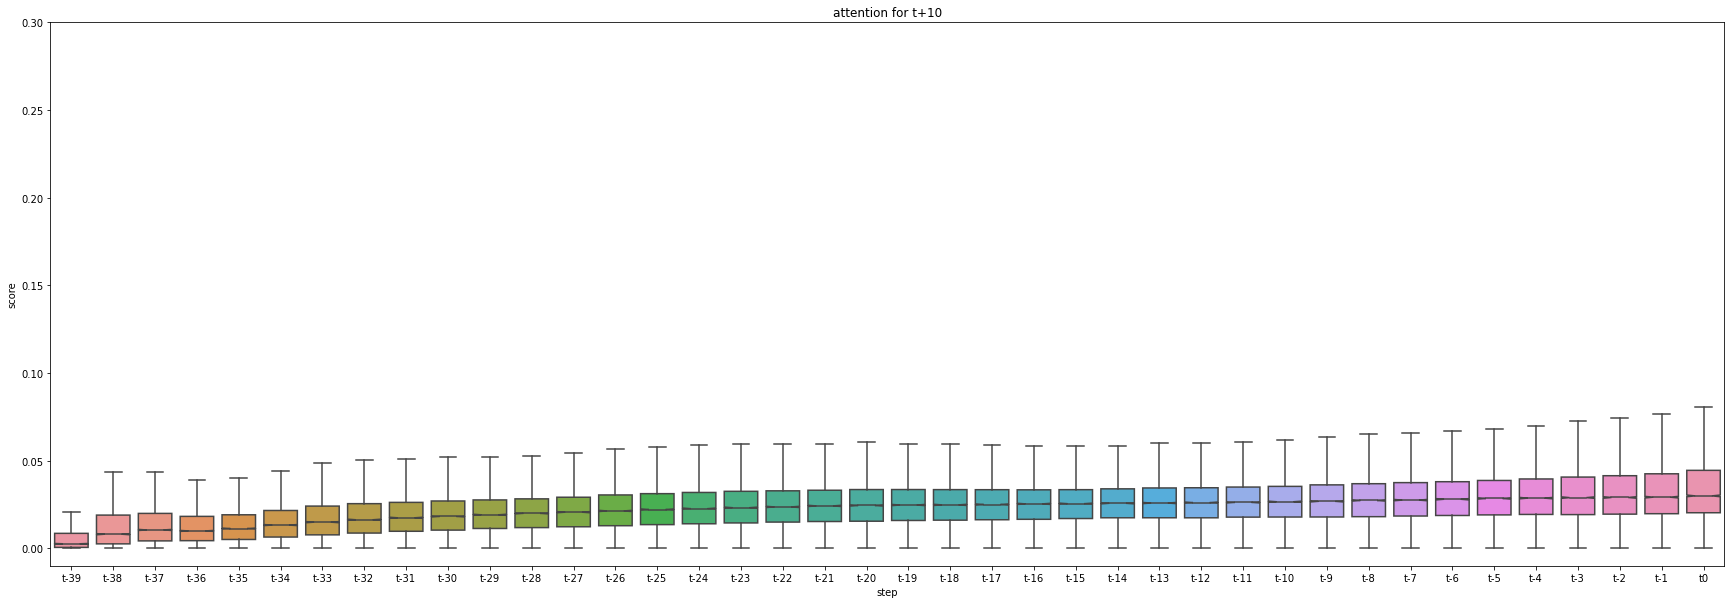

model 7


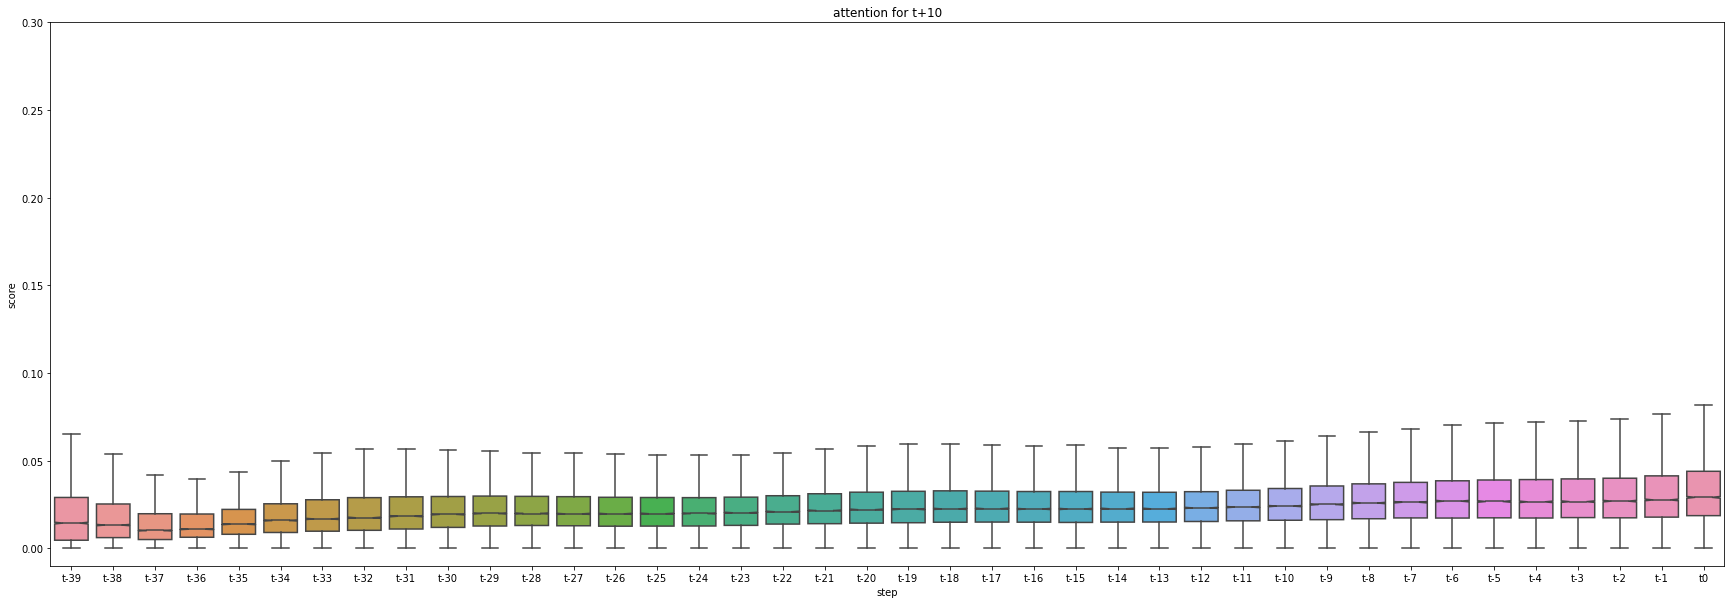

model 8


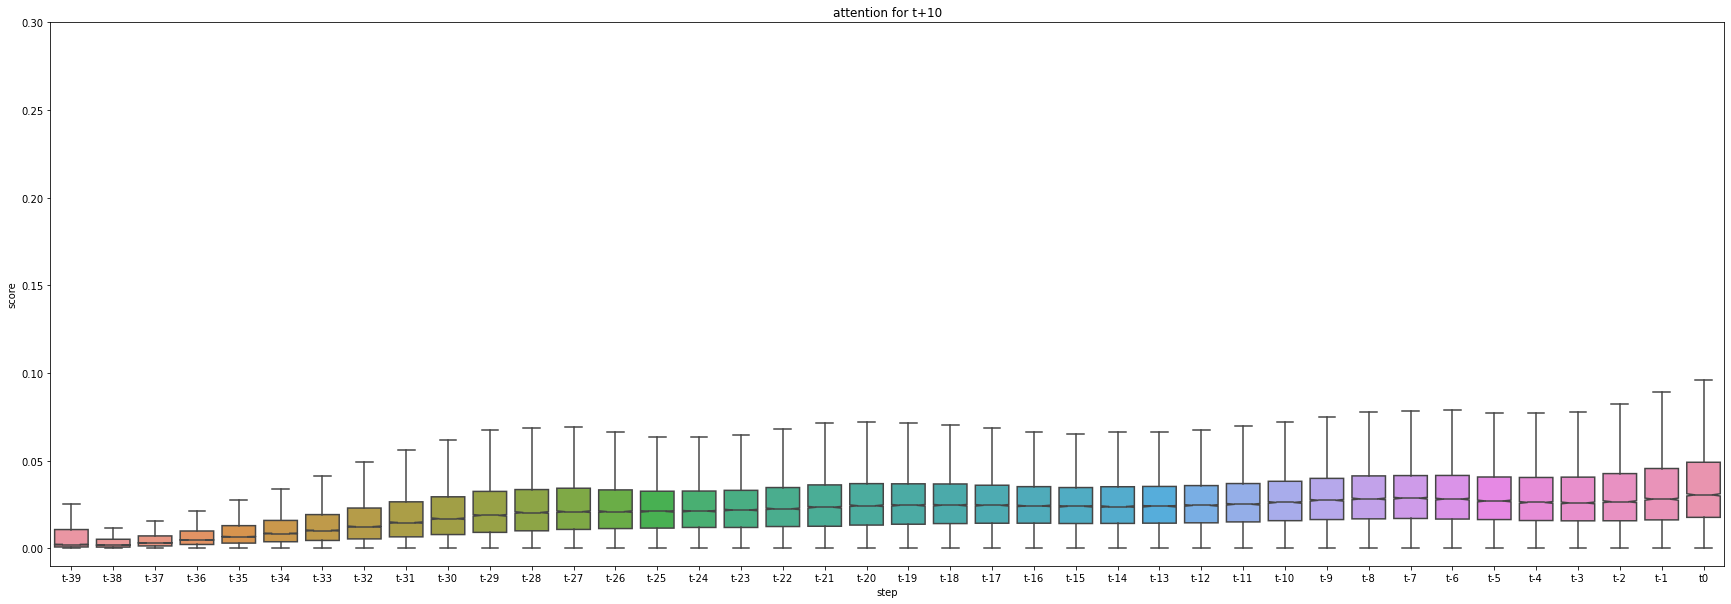

model 9


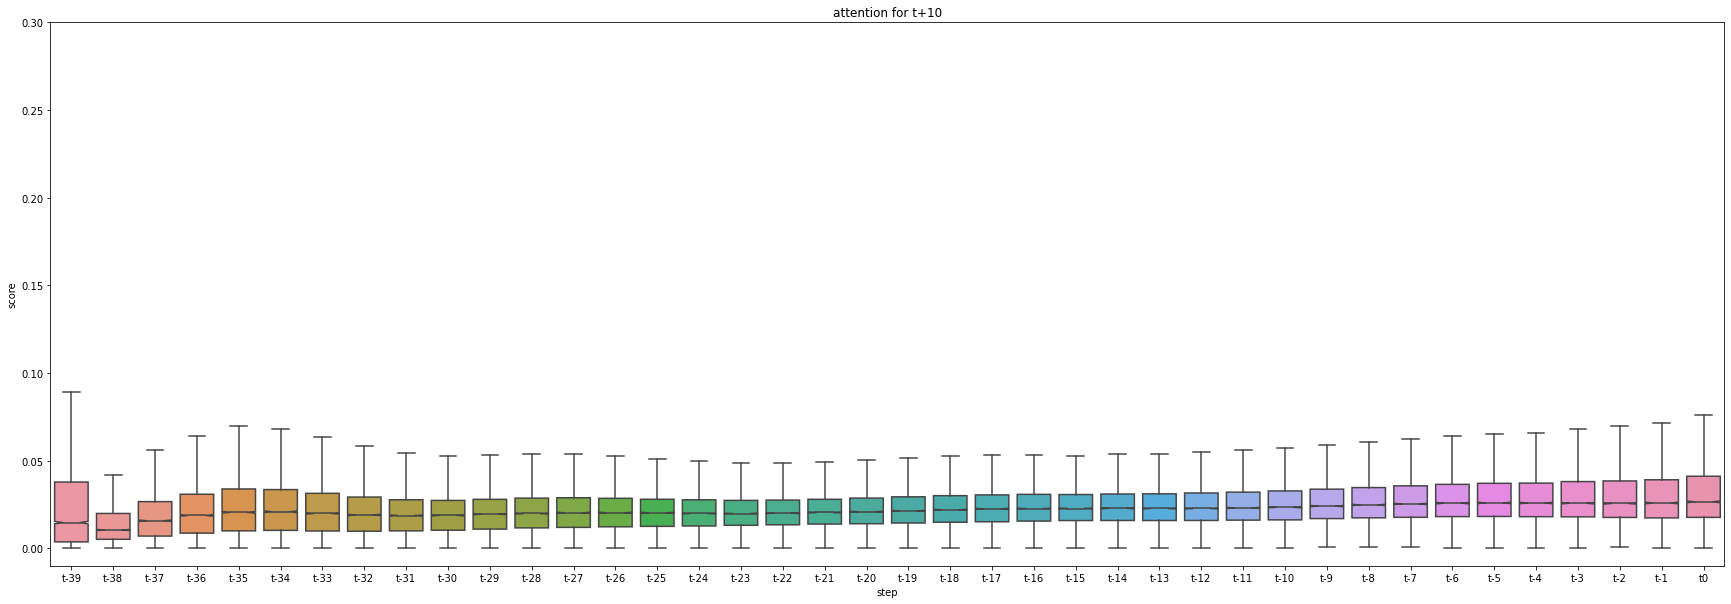

model 10


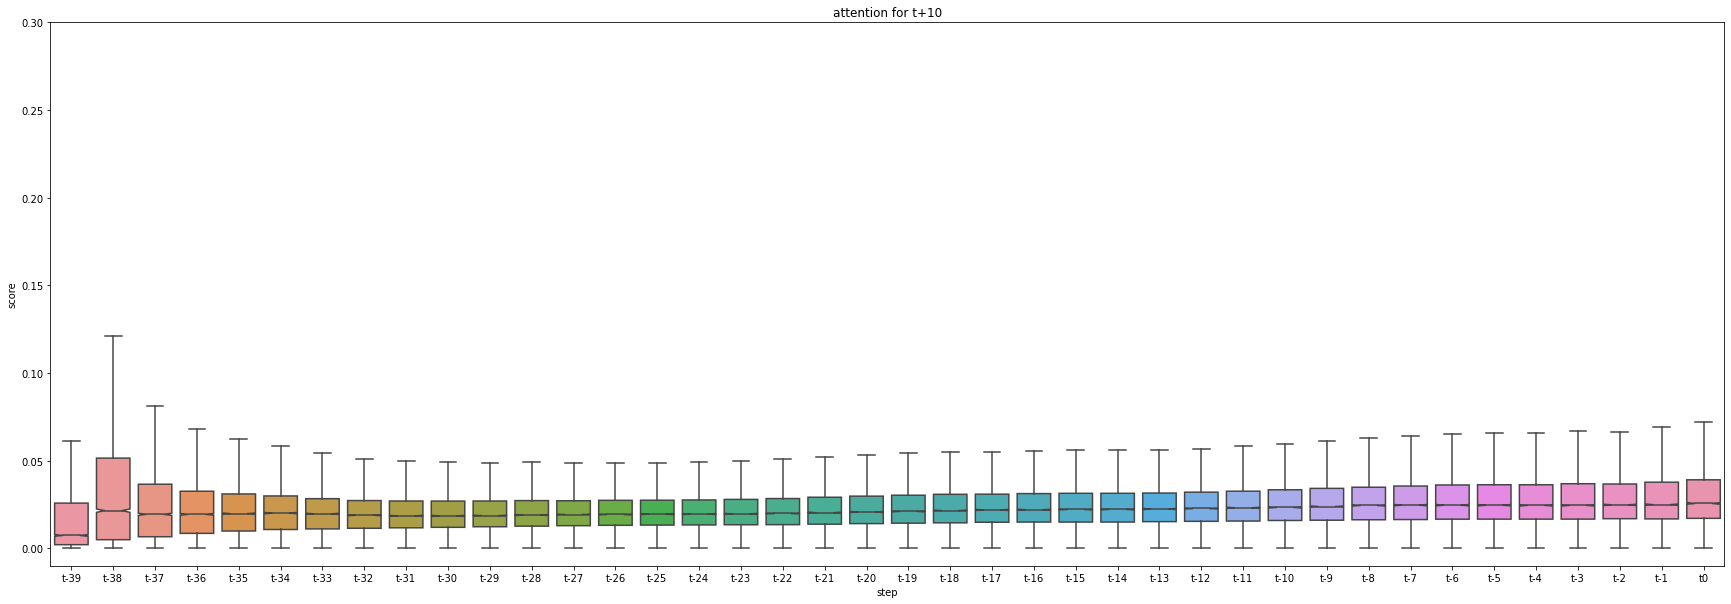

In [64]:
# _ = DATT_seq2seq_GRU.test(False)
plot_steps = [9]

for model_num in range(1,11):
    model_name = f"{history_size}_{future_size}_{num_layers}_{num_neurons}_{dense_layers}_{dense_neurons}_{model_type}_{model_num}"
    DATT_seq2seq_GRU.model.load_weights(f"./model/{model_name}.h5")
    attention = DATT_seq2seq_GRU.get_attention(DATT_seq2seq_GRU.history_test_sc)
    print(f"model {model_num}")
    for future_step in plot_steps:
        attention_step = pd.DataFrame(attention[:,future_step,:], columns=[f't{i-history_size+1}' for i in range(history_size)])

        for i in range(history_size):
            history_step = i-history_size+1
            if not i:
                attention_reshape = attention_step[[f't{history_step}']].copy()
                attention_reshape.columns = ['score']
                attention_reshape['step'] = f't{history_step}'
            else:
                temp = attention_step[[f't{history_step}']].copy()
                temp.columns = ['score']
                temp['step'] = f't{history_step}'        
                attention_reshape = pd.concat([attention_reshape, temp], axis=0)
            attention_reshape.reset_index(drop=True, inplace=True)

        plt.figure(figsize=(30,10))
        sns.boxplot(x='step', y='score', data=attention_reshape, notch=True, showfliers = False)
        plt.ylim(-0.01, 0.3)
        plt.title(f"attention for t+{future_step+1}")
        # savefile(_, './figure', f'AttentionScore_history{history_size}future{future_size}_step{future_step}', 'figure')
        plt.show()

## (40,20)

### setting

In [65]:
target_list = cts_list

# history size and future size
history_size = 40
future_size = 20
step = 1

# variable selection
history_var = process_var
future_var = output_var

history_num = len(history_var)
future_num = len(future_var)

# data to series
history_series = []
future_series = []

for i in range(len(target_list)):
    history, future = data2series(target_list[i], history_size, history_var, future_size, future_var,
                                  step, start_idx=0, end_idx=None)
    if not i:
        history_series = history
        future_series = future
    else:
        history_series = np.concatenate([history_series, history], axis=0)
        future_series = np.concatenate([future_series, future], axis=0)

print(history_series.shape)
print(future_series.shape)

# supervised attention factor 생성
delta = 1
att_type = 'linear'
factor = rnn.super_attention(delta, future_size, future_num, att_type)

# RNN class 생성
DATT_seq2seq_GRU = rnn.RNN(history_series, history_var, future_series, future_var)

# 테스트 데이터 스플릿
test_size = 0.2
test_num = -1
DATT_seq2seq_GRU.train_test(test_size=test_size, test_num=test_num)

# 검증 데이터 스플릿
valid_size = DATT_seq2seq_GRU.history_test.shape[0]/DATT_seq2seq_GRU.history_train.shape[0]
DATT_seq2seq_GRU.train_valid(valid_size=valid_size)

# 데이터 스케일링
DATT_seq2seq_GRU.scaling()

# 모델 구성
num_layers = 1
num_neurons = 50
dense_layers = 1
dense_neurons = 50
model_type = 'datt_seq2seq_gru'
DATT_seq2seq_GRU.build_model(num_layers=num_layers, num_neurons=num_neurons, dense_layers=dense_layers, dense_neurons=dense_neurons, model_type=model_type, factor=factor)
print(DATT_seq2seq_GRU.model.summary())

(30004, 40, 7)
(30004, 20, 3)
Model: "model_33"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 40, 7)]      0           []                               
                                                                                                  
 encoder (GRU)                  [(None, 40, 50),     8850        ['input_6[0][0]']                
                                 (None, 50)]                                                      
                                                                                                  
 repeat_vector_5 (RepeatVector)  (None, 20, 50)      0           ['encoder[0][1]']                
                                                                                                  
 decoder (GRU)                  (None, 20, 50)       15300   

### result

,TT-3061-3,TT-3061-5,LT-3061-2,mean,TT-3061-3,TT-3061-5,LT-3061-2,mean
index,R2,R2,R2,R2,nRMSE,nRMSE,nRMSE,nRMSE
0,0.873442,0.910635,0.948814,0.910964,7.019384,5.256355,3.47522,5.25032
1,0.81089,0.833929,0.900048,0.848289,8.426356,7.16783,4.857686,6.817291
2,0.724729,0.789901,0.853353,0.789328,9.72346,8.065295,5.885676,7.891477
3,0.632204,0.763658,0.822024,0.739295,10.864051,8.557202,6.485398,8.635551
4,0.546602,0.744297,0.807606,0.699502,11.869132,8.904771,6.74451,9.172804
5,0.465785,0.726097,0.79925,0.663711,12.840136,9.22039,6.890612,9.65038
6,0.386868,0.707544,0.791111,0.628508,13.486122,9.529722,7.030325,10.01539
7,0.310449,0.688017,0.779601,0.592689,14.028467,9.844921,7.222837,10.365408
8,0.241661,0.668057,0.759722,0.55648,14.494192,10.156735,7.542886,10.731271


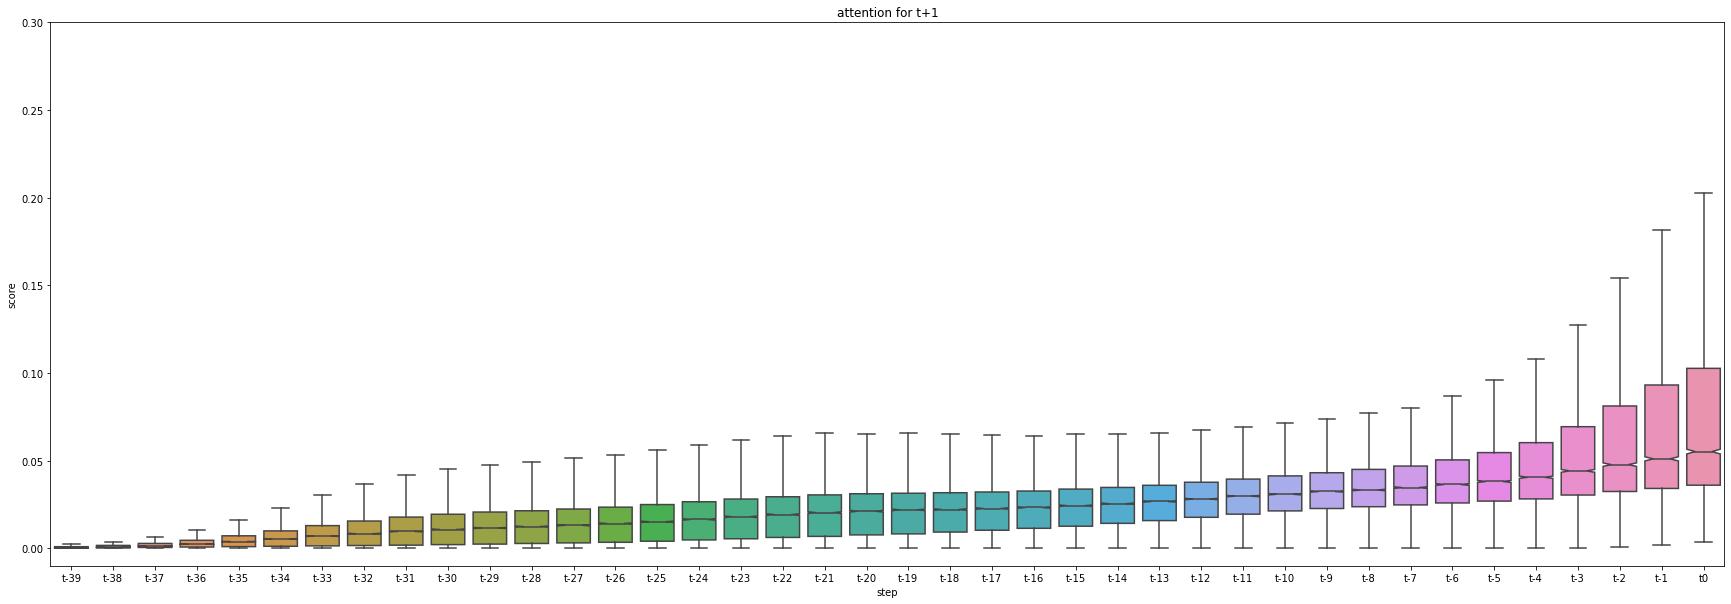

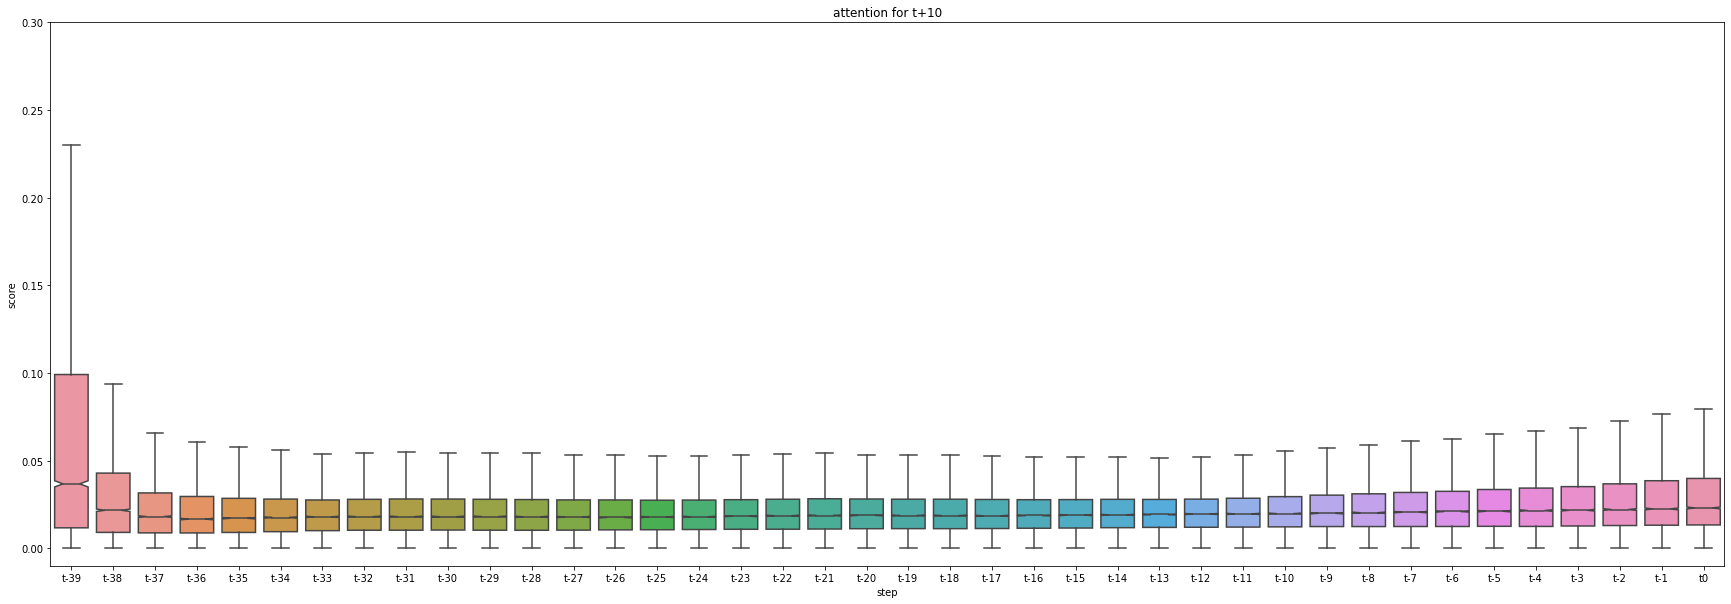

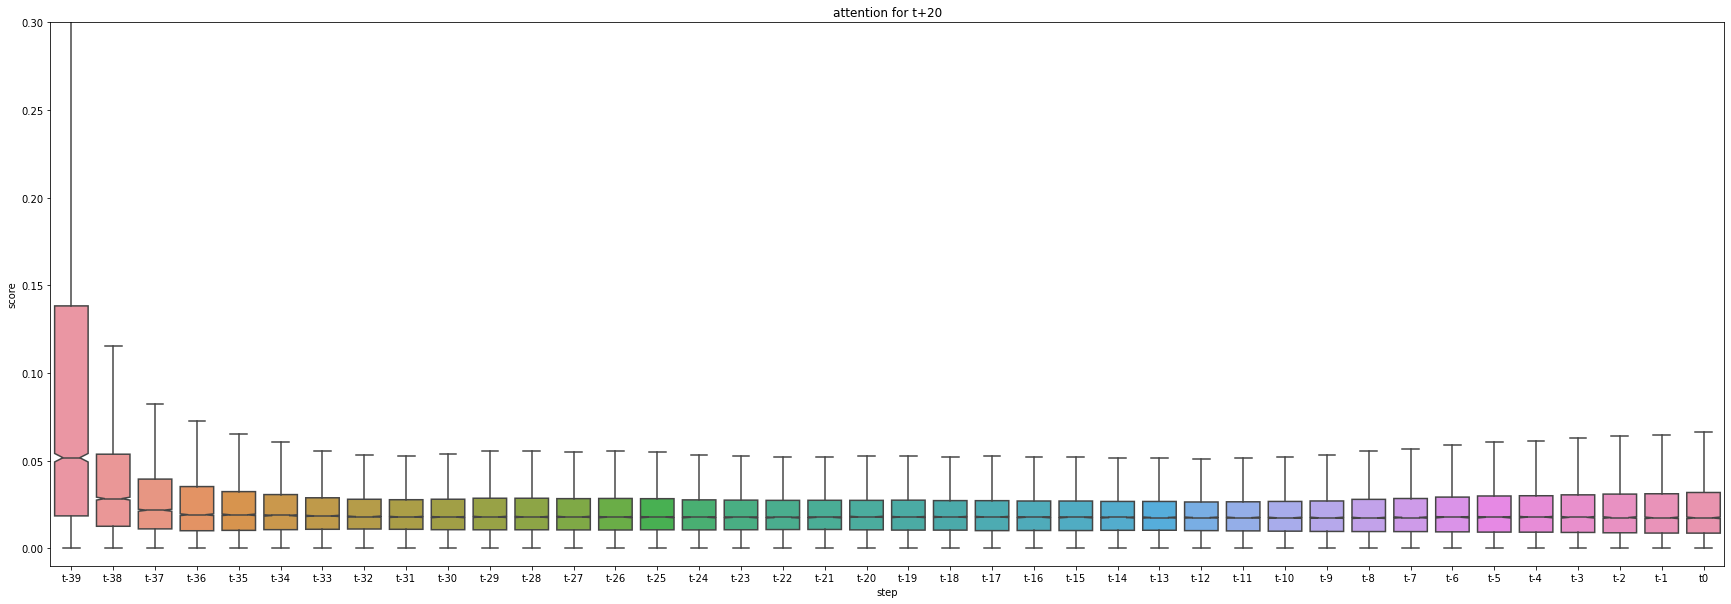

In [66]:
# selec model number
model_num = 1
model_name = f"{history_size}_{future_size}_{num_layers}_{num_neurons}_{dense_layers}_{dense_neurons}_{model_type}_{model_num}"
DATT_seq2seq_GRU.model.load_weights(f"./model/{model_name}.h5")

_ = DATT_seq2seq_GRU.test()

attention = DATT_seq2seq_GRU.get_attention(DATT_seq2seq_GRU.history_test_sc)
plot_steps = [0,9, 19]

for future_step in plot_steps:
    attention_step = pd.DataFrame(attention[:,future_step,:], columns=[f't{i-history_size+1}' for i in range(history_size)])

    for i in range(history_size):
        history_step = i-history_size+1
        if not i:
            attention_reshape = attention_step[[f't{history_step}']].copy()
            attention_reshape.columns = ['score']
            attention_reshape['step'] = f't{history_step}'
        else:
            temp = attention_step[[f't{history_step}']].copy()
            temp.columns = ['score']
            temp['step'] = f't{history_step}'        
            attention_reshape = pd.concat([attention_reshape, temp], axis=0)
        attention_reshape.reset_index(drop=True, inplace=True)

    plt.figure(figsize=(30,10))
    sns.boxplot(x='step', y='score', data=attention_reshape, notch=True, showfliers = False)
    plt.ylim(-0.01, 0.3)
    plt.title(f"attention for t+{future_step+1}")
    savefile(_, './figure', f'AttentionScore_history{history_size}future{future_size}_step{future_step}', 'figure')
    plt.show()

### prediction plot

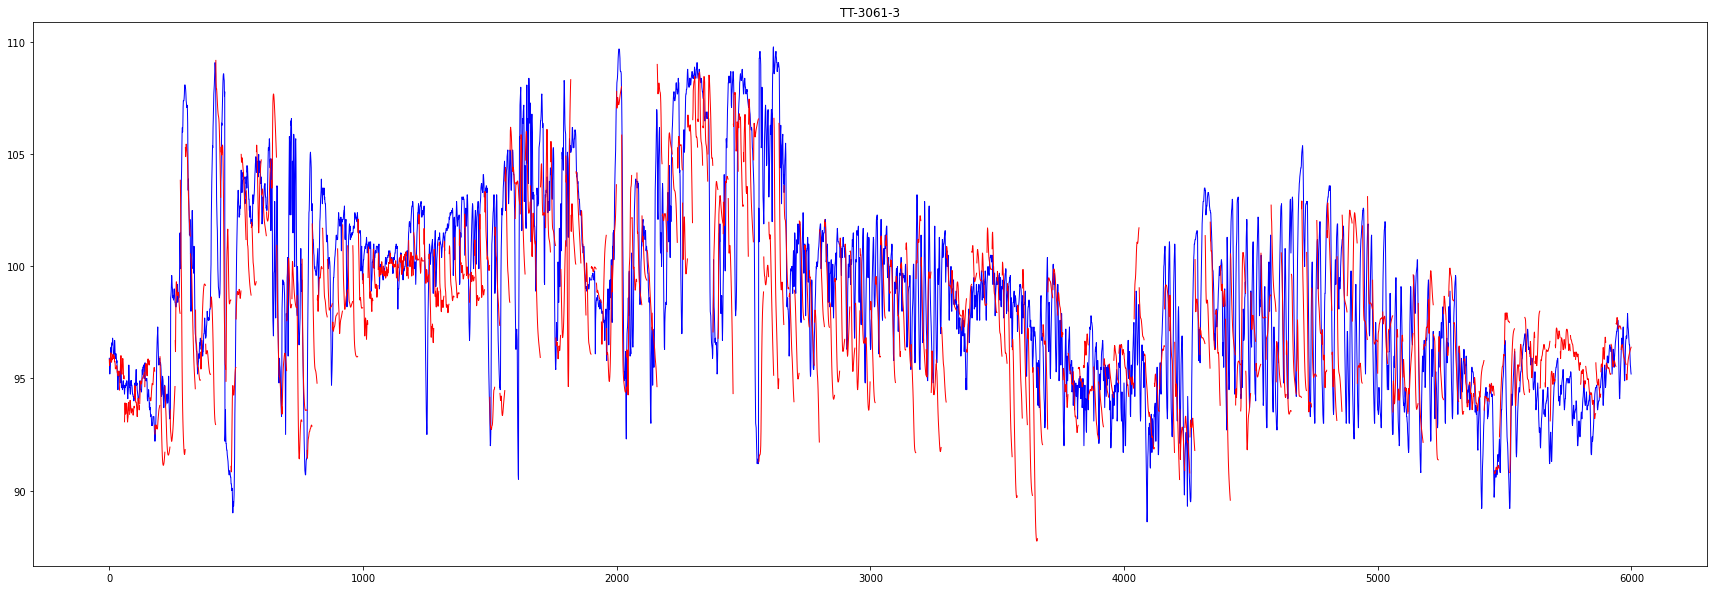

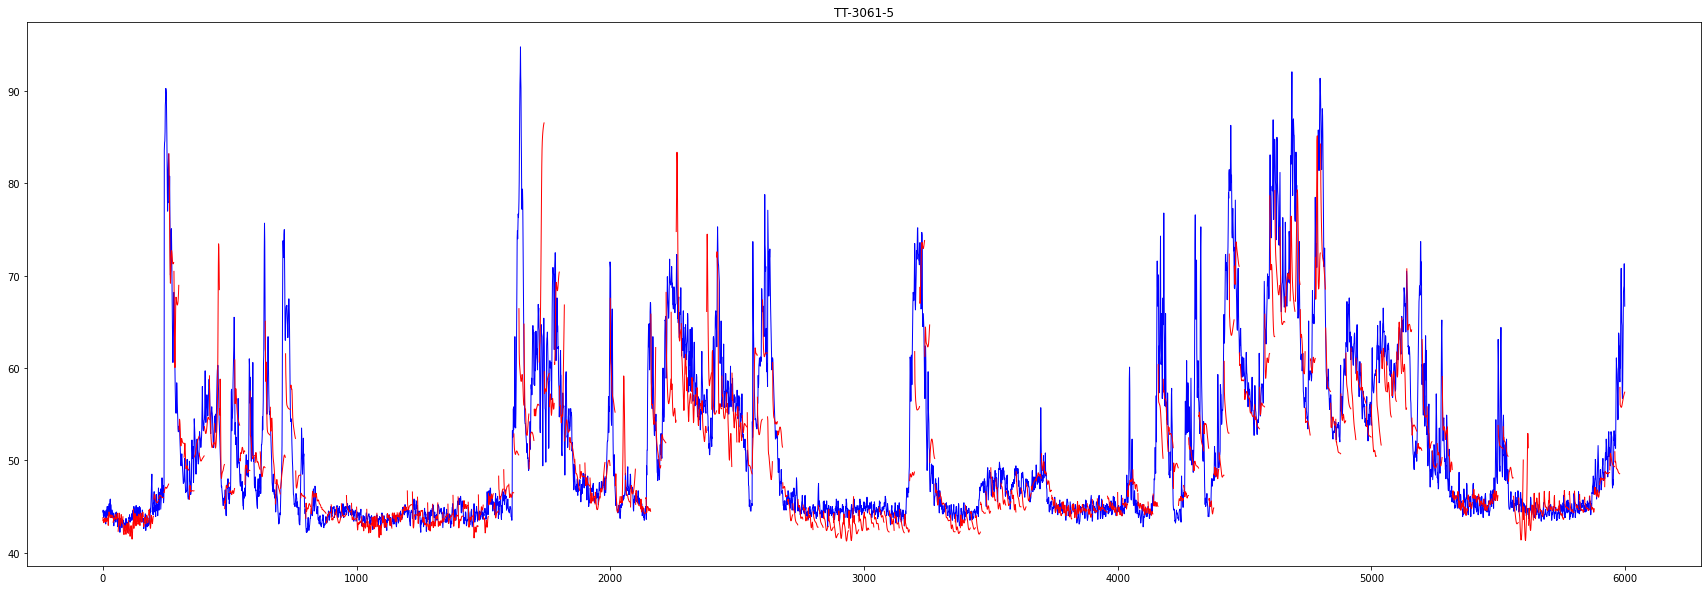

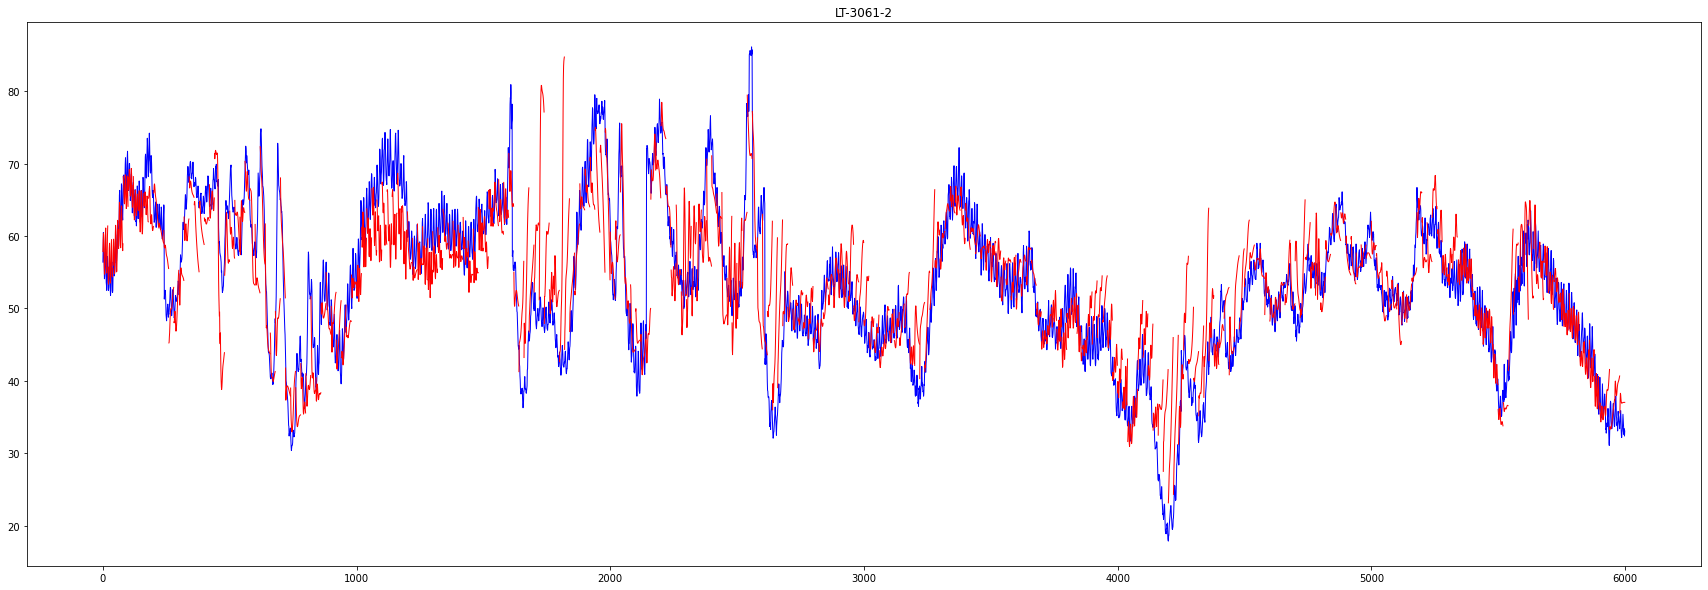

In [67]:
for var_num in range(len(future_var)):
    predict_wt = DATT_seq2seq_GRU.model.predict(DATT_seq2seq_GRU.history_test_sc)
    predict_sc = predict_wt/DATT_seq2seq_GRU.factor
    actual_sc = DATT_seq2seq_GRU.future_test_sc
    _, predict = DATT_seq2seq_GRU.unscaling(DATT_seq2seq_GRU.history_test_sc, predict_sc)
    _, actual = DATT_seq2seq_GRU.unscaling(DATT_seq2seq_GRU.history_test_sc, actual_sc)

    plt.figure(figsize=(30,10))
    plt.plot(np.arange(0,len(actual)), actual[:,0,var_num], label='actual', linewidth=1, color='b')

    for start_idx in range(0, len(predict), future_size):
        end_idx = start_idx + future_size
        predict_plot = predict[start_idx, :, var_num]
        plt.plot(np.arange(start_idx, start_idx + len(predict_plot)), predict_plot, label='prediction', linewidth=1, color='r')
    plt.title(f'{future_var[var_num]}')
    savefile(_, './figure', f'PredictionPlot_history{history_size}future{future_size}_{future_var[var_num]}', 'figure')
    plt.show()

### attention iteration

### select model number


model 1


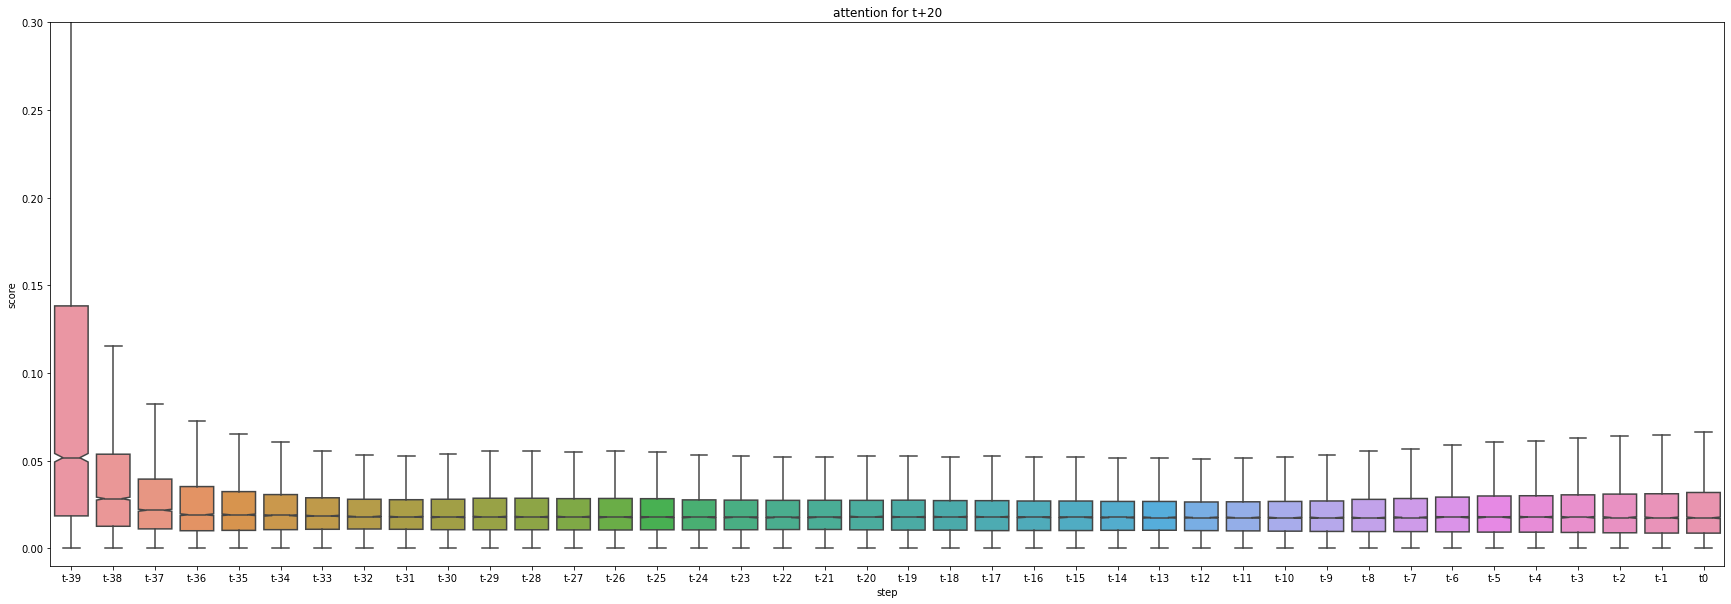

model 2


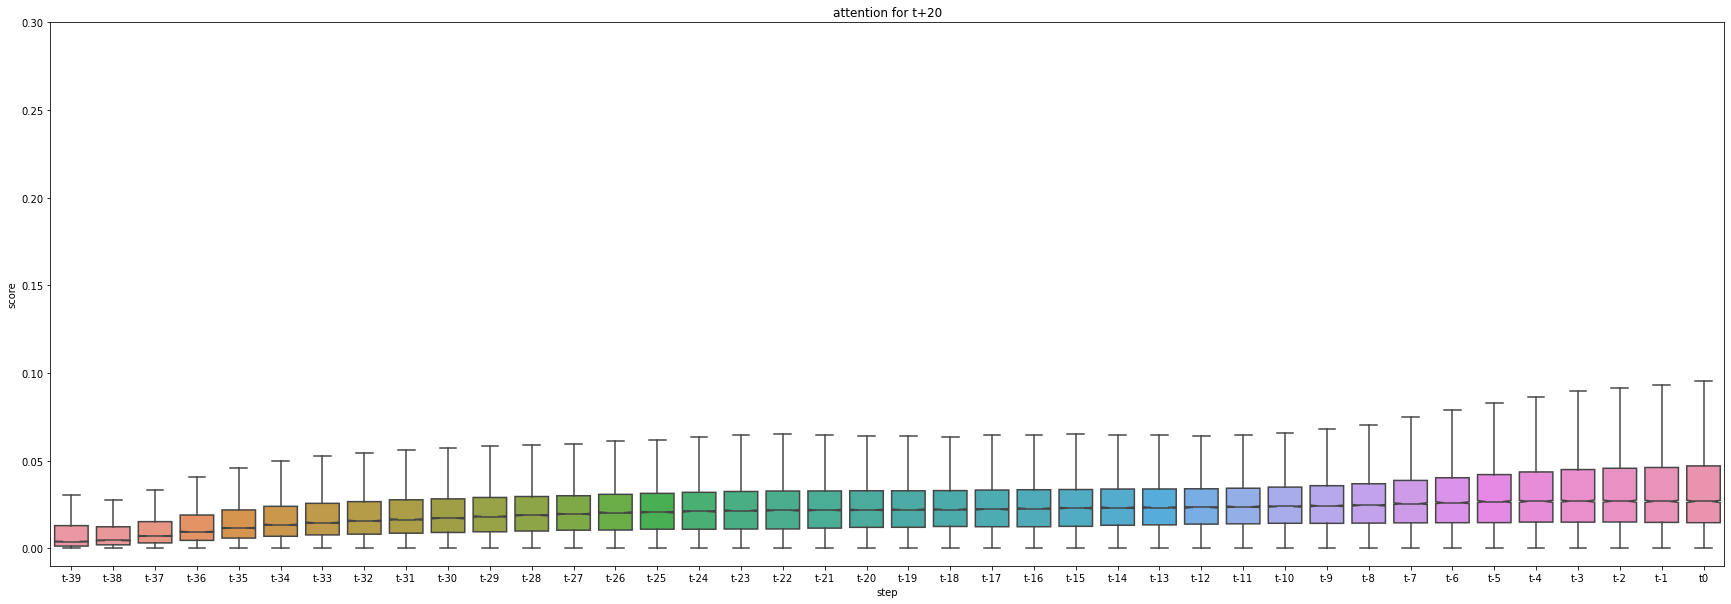

model 3


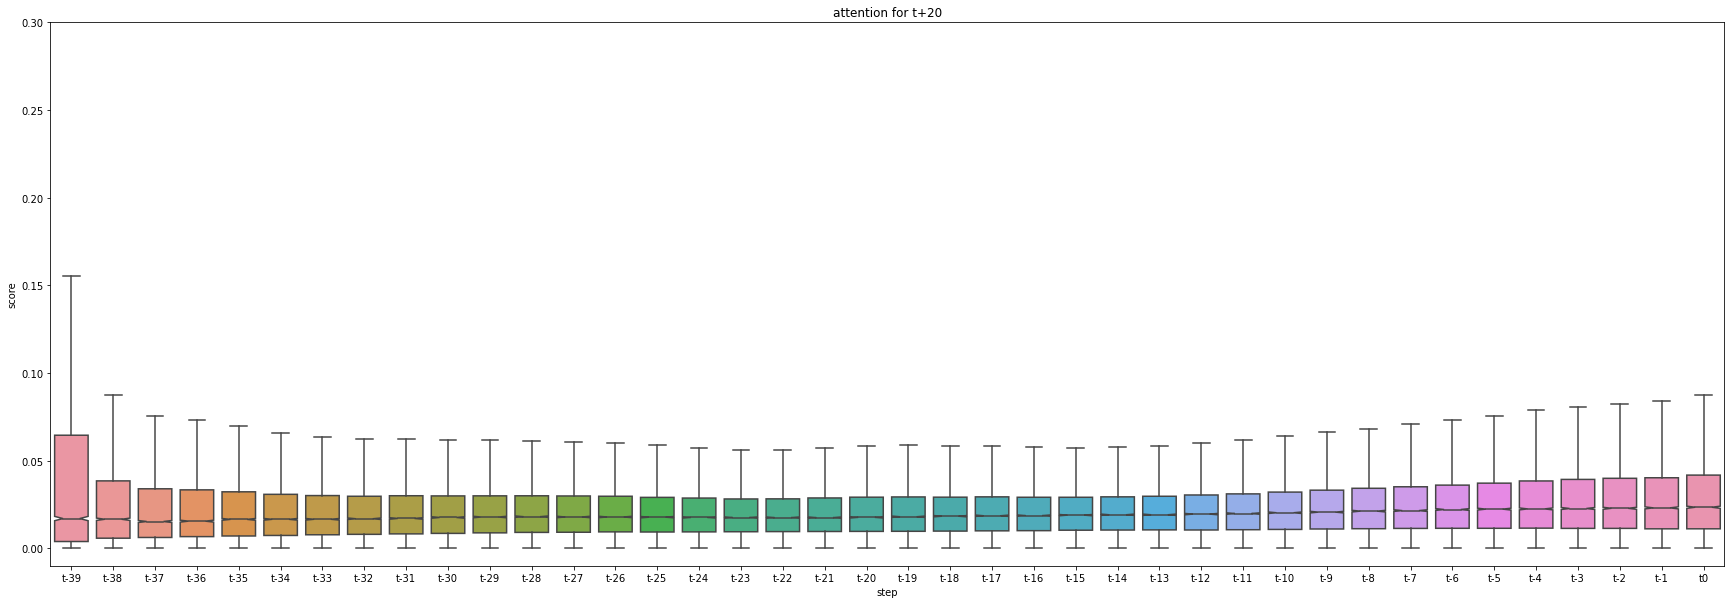

model 4


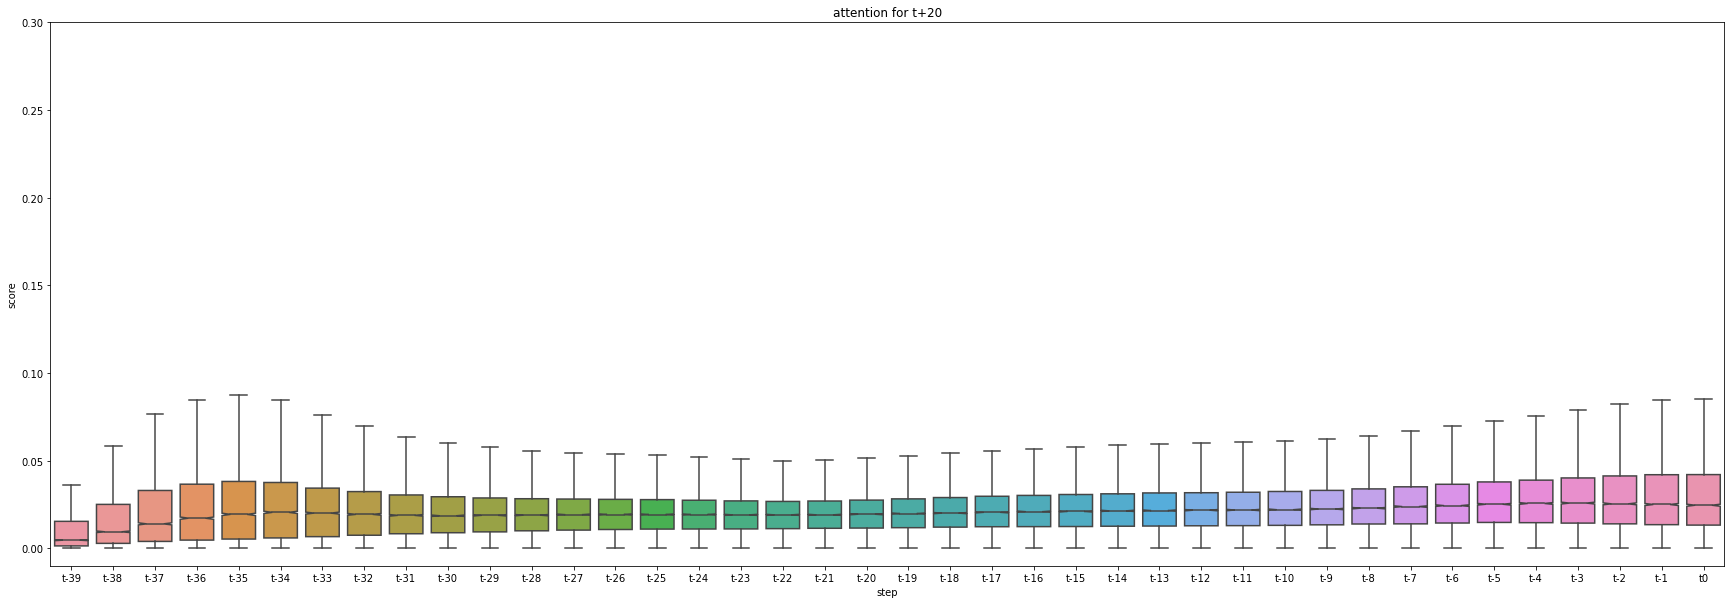

model 5


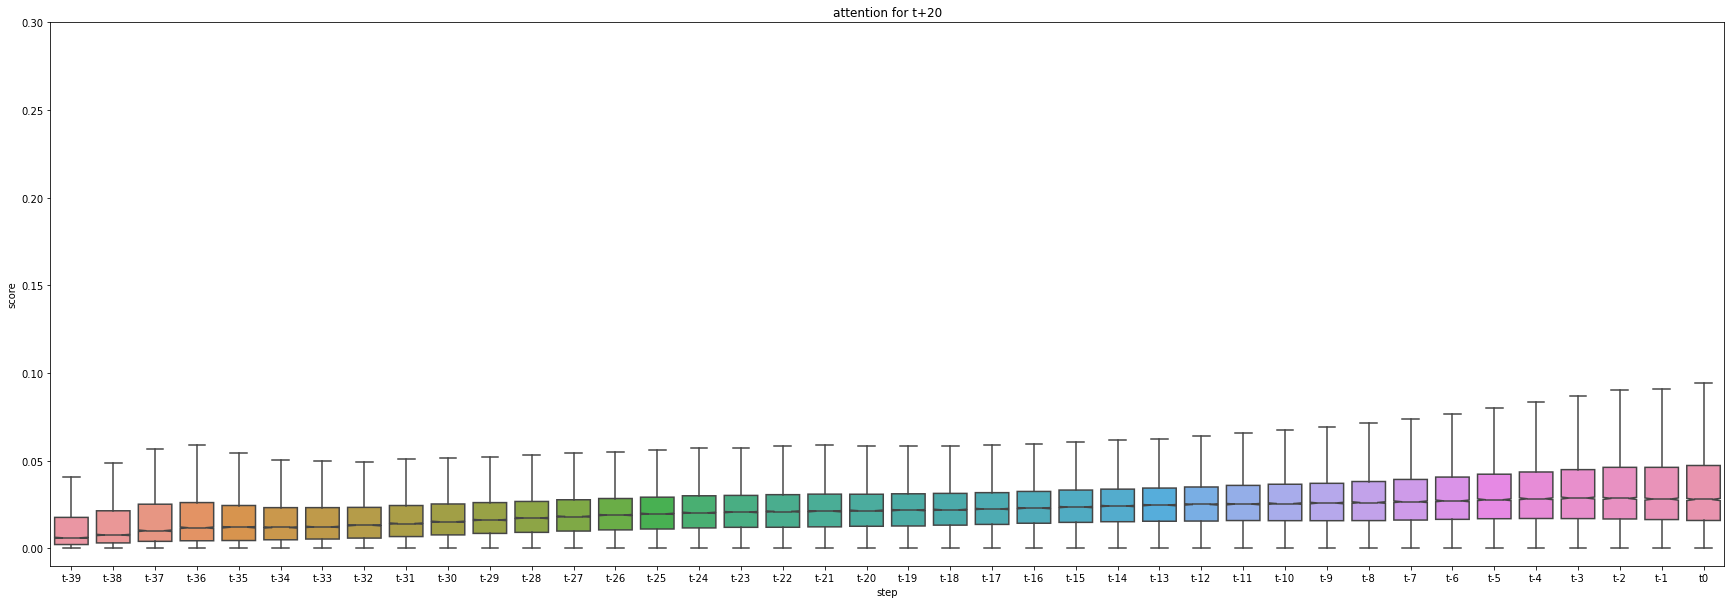

model 6


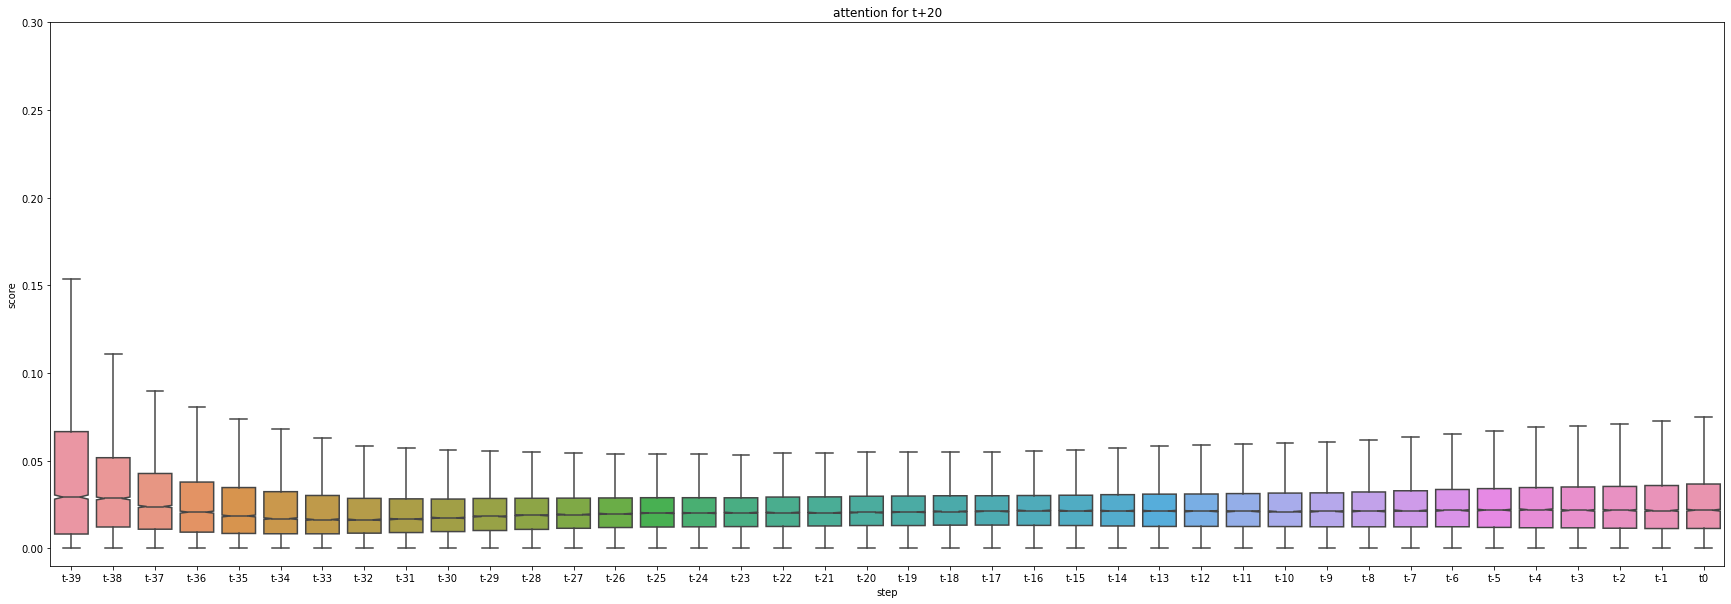

model 7


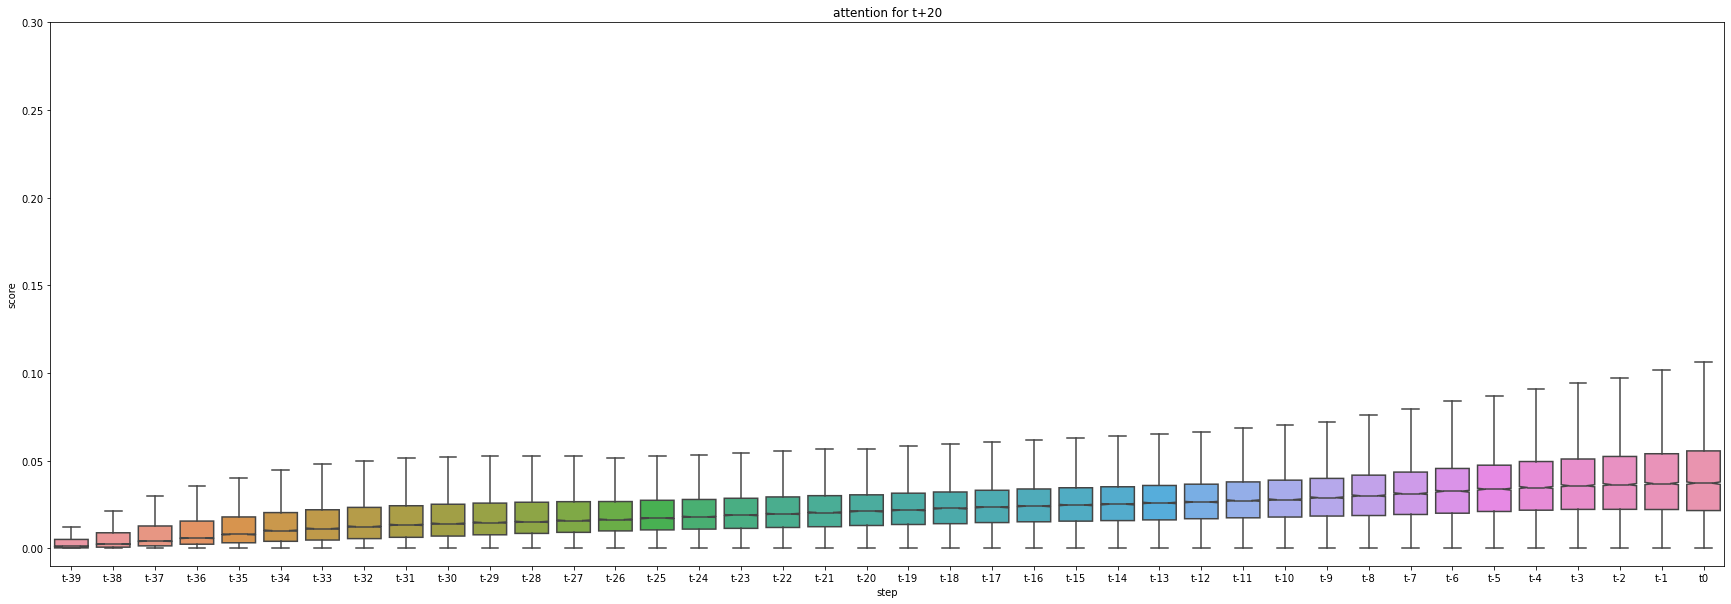

model 8


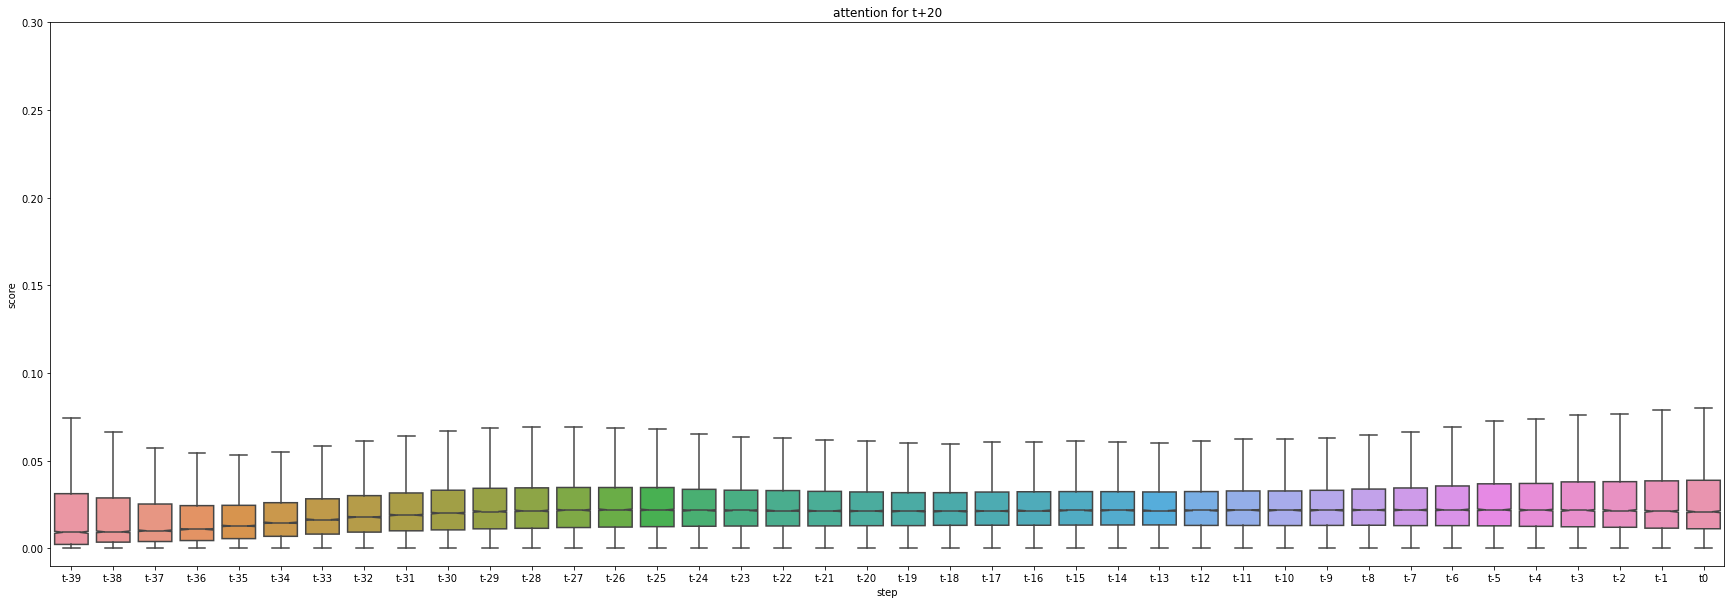

model 9


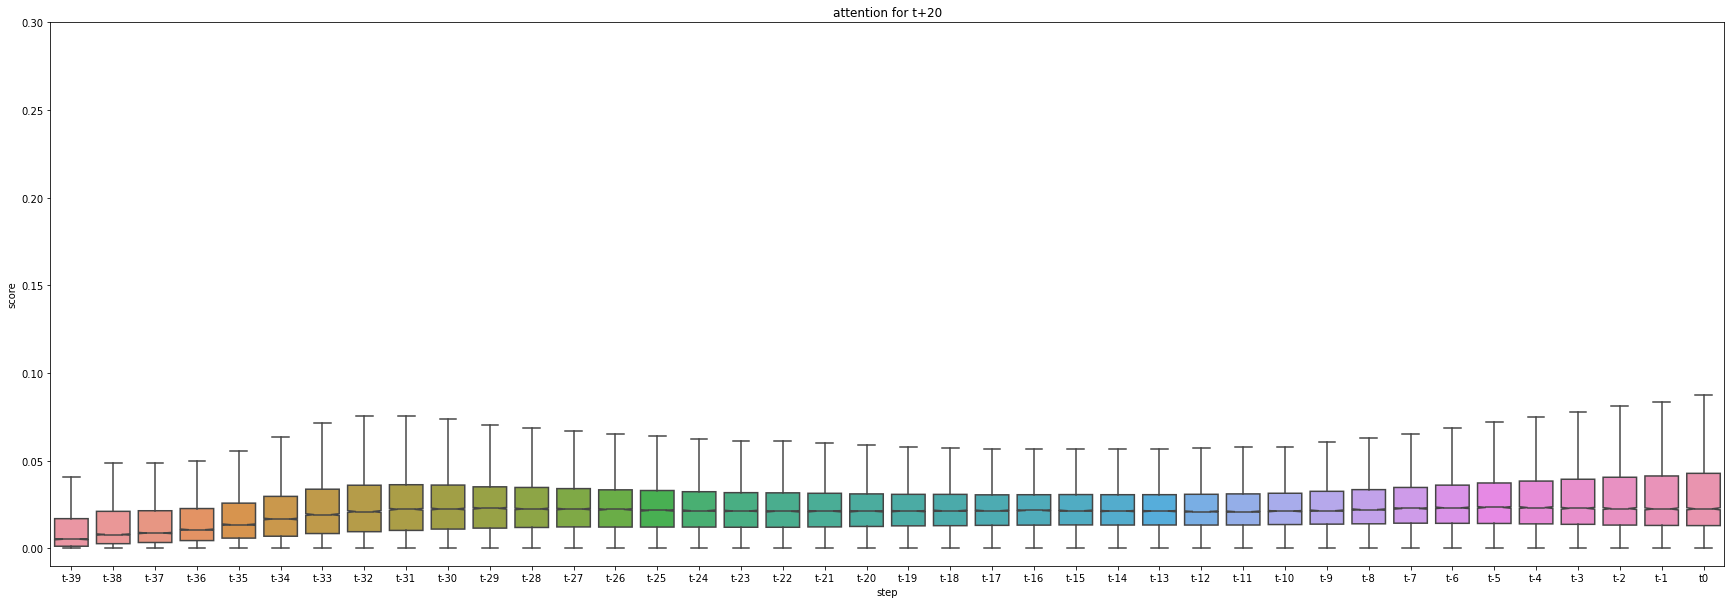

model 10


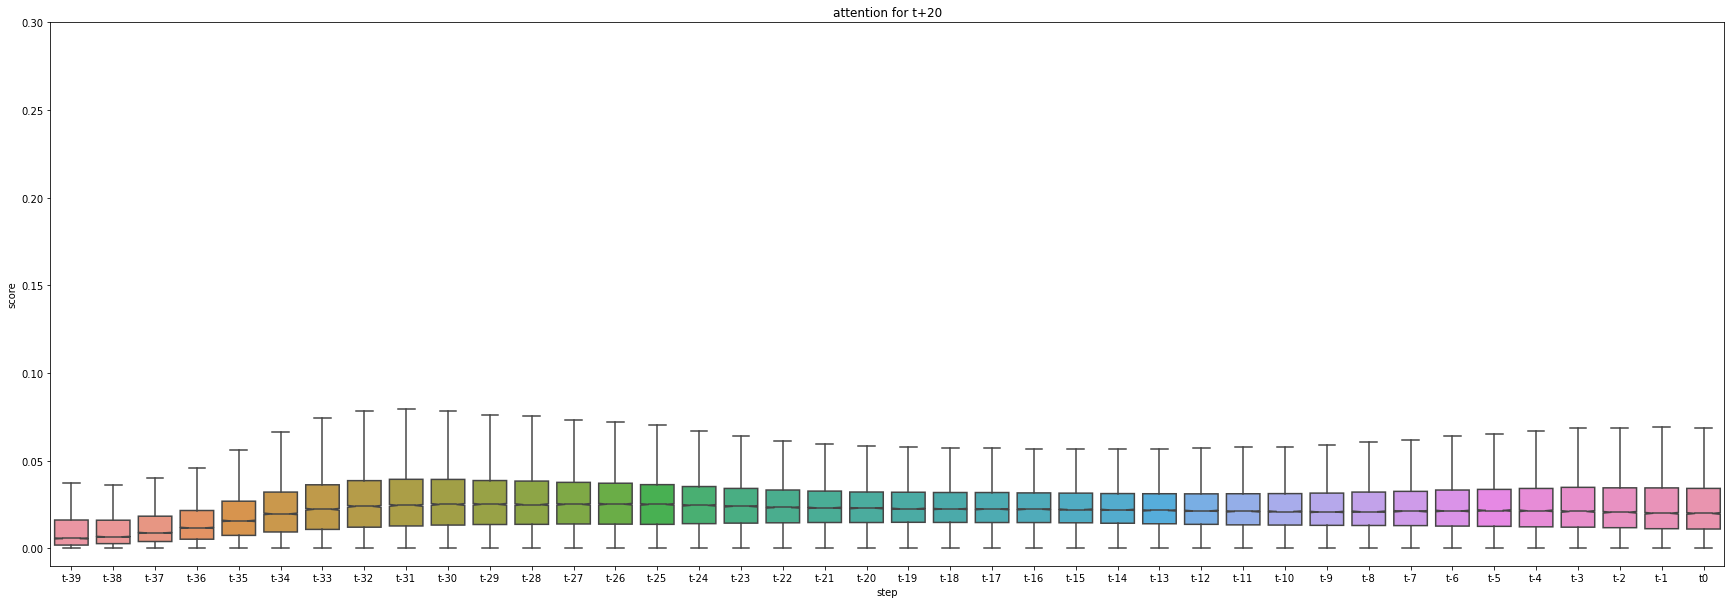

In [68]:
# _ = DATT_seq2seq_GRU.test(False)
plot_steps = [19]

for model_num in range(1,11):
    model_name = f"{history_size}_{future_size}_{num_layers}_{num_neurons}_{dense_layers}_{dense_neurons}_{model_type}_{model_num}"
    DATT_seq2seq_GRU.model.load_weights(f"./model/{model_name}.h5")
    attention = DATT_seq2seq_GRU.get_attention(DATT_seq2seq_GRU.history_test_sc)
    print(f"model {model_num}")
    for future_step in plot_steps:
        attention_step = pd.DataFrame(attention[:,future_step,:], columns=[f't{i-history_size+1}' for i in range(history_size)])

        for i in range(history_size):
            history_step = i-history_size+1
            if not i:
                attention_reshape = attention_step[[f't{history_step}']].copy()
                attention_reshape.columns = ['score']
                attention_reshape['step'] = f't{history_step}'
            else:
                temp = attention_step[[f't{history_step}']].copy()
                temp.columns = ['score']
                temp['step'] = f't{history_step}'        
                attention_reshape = pd.concat([attention_reshape, temp], axis=0)
            attention_reshape.reset_index(drop=True, inplace=True)

        plt.figure(figsize=(30,10))
        sns.boxplot(x='step', y='score', data=attention_reshape, notch=True, showfliers = False)
        plt.ylim(-0.01, 0.3)
        plt.title(f"attention for t+{future_step+1}")
        # savefile(_, './figure', f'AttentionScore_history{history_size}future{future_size}_step{future_step}', 'figure')
        plt.show()

model 7


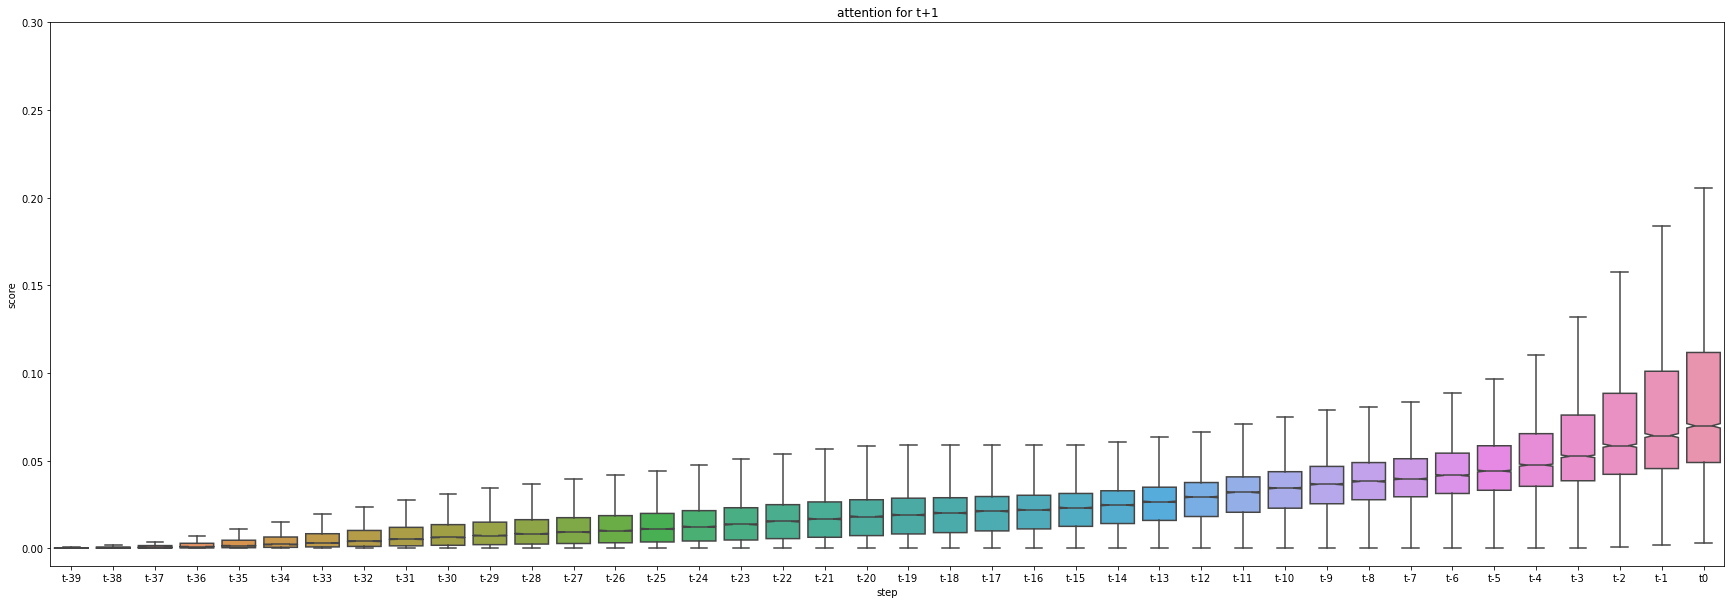

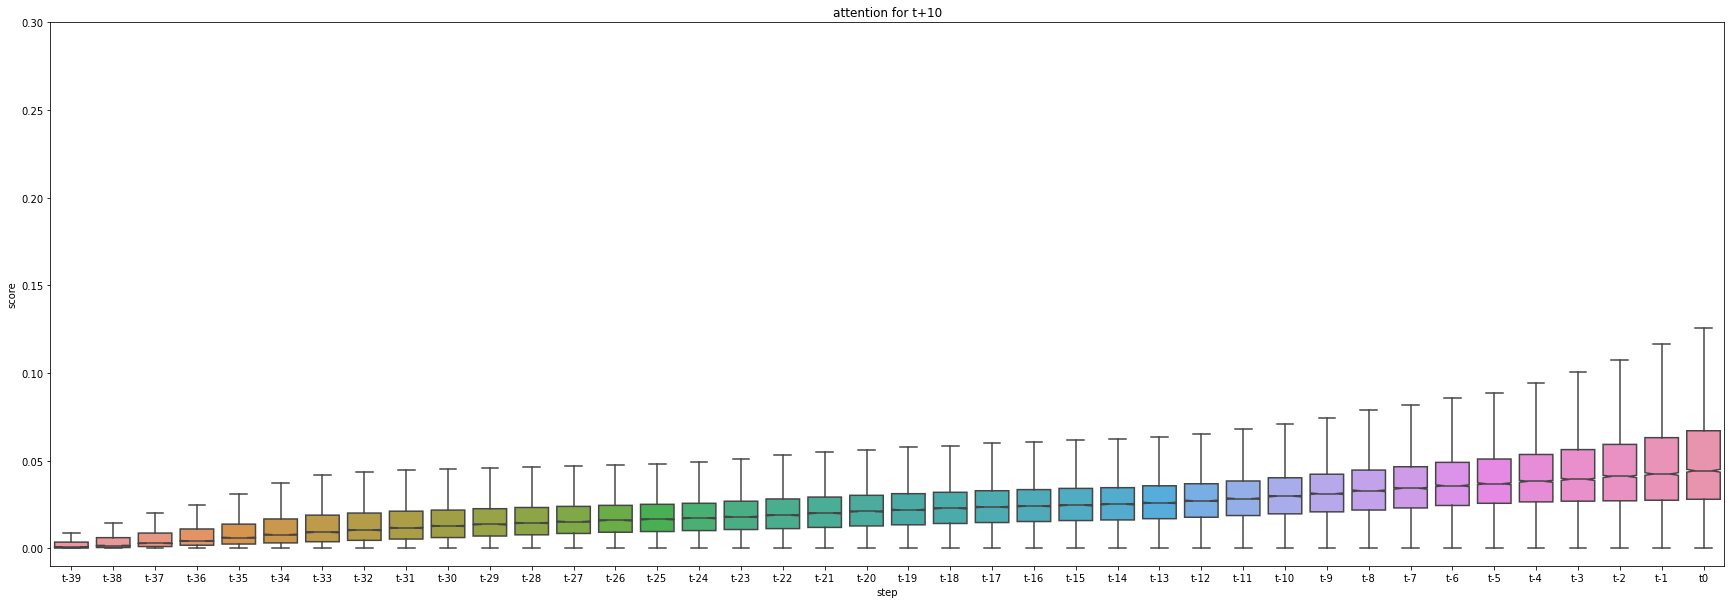

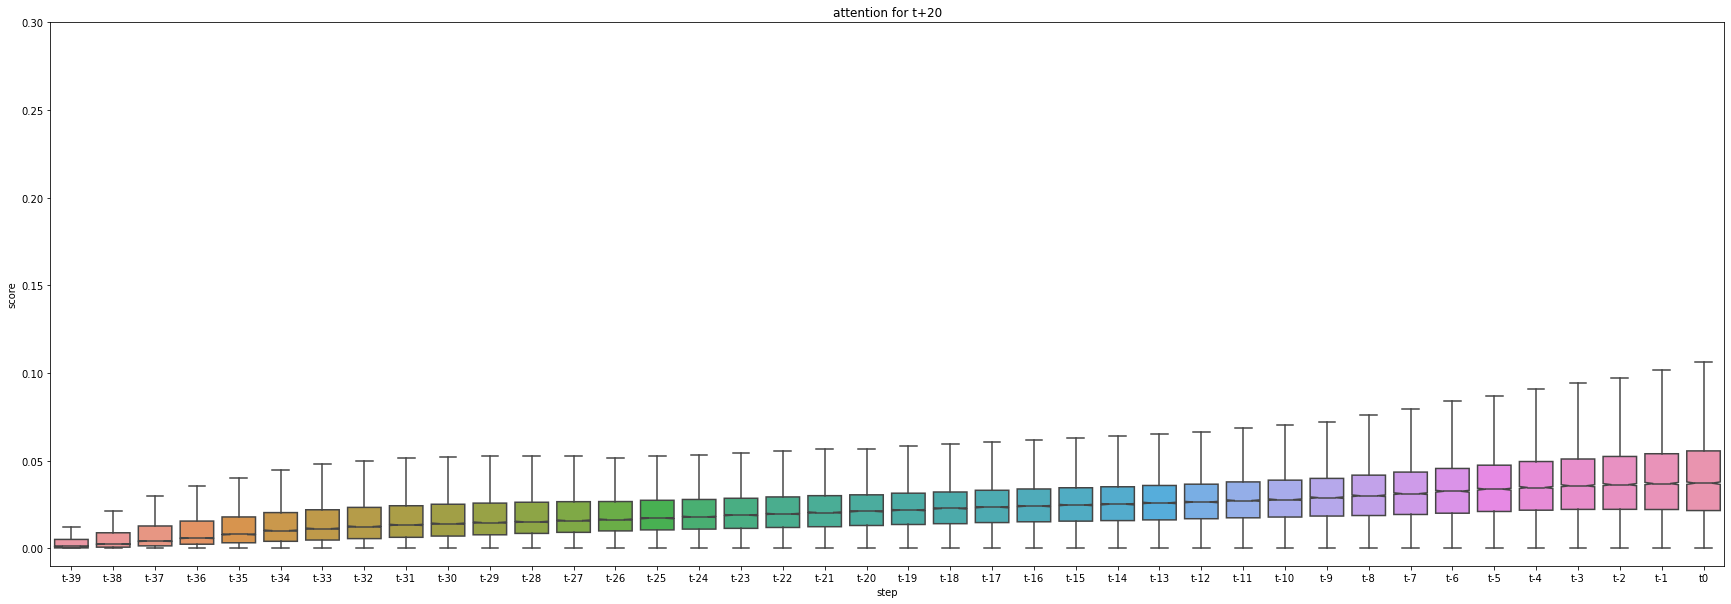

In [69]:
# _ = DATT_seq2seq_GRU.test(False)
plot_steps = [0, 9, 19]
model_num = 7

model_name = f"{history_size}_{future_size}_{num_layers}_{num_neurons}_{dense_layers}_{dense_neurons}_{model_type}_{model_num}"
DATT_seq2seq_GRU.model.load_weights(f"./model/{model_name}.h5")
attention = DATT_seq2seq_GRU.get_attention(DATT_seq2seq_GRU.history_test_sc)
print(f"model {model_num}")
for future_step in plot_steps:
    attention_step = pd.DataFrame(attention[:,future_step,:], columns=[f't{i-history_size+1}' for i in range(history_size)])

    for i in range(history_size):
        history_step = i-history_size+1
        if not i:
            attention_reshape = attention_step[[f't{history_step}']].copy()
            attention_reshape.columns = ['score']
            attention_reshape['step'] = f't{history_step}'
        else:
            temp = attention_step[[f't{history_step}']].copy()
            temp.columns = ['score']
            temp['step'] = f't{history_step}'        
            attention_reshape = pd.concat([attention_reshape, temp], axis=0)
        attention_reshape.reset_index(drop=True, inplace=True)

    plt.figure(figsize=(30,10))
    sns.boxplot(x='step', y='score', data=attention_reshape, notch=True, showfliers = False)
    plt.ylim(-0.01, 0.3)
    plt.title(f"attention for t+{future_step+1}")
    # savefile(_, './figure', f'AttentionScore_history{history_size}future{future_size}_step{future_step}', 'figure')
    plt.show()

# figure 2

In [ ]:
target_list = cts_list

# history size and future size
history_size = 40
future_size = 20
step = 1

# variable selection
history_var = process_var
future_var = output_var

history_num = len(history_var)
future_num = len(future_var)

# data to series
history_series = []
future_series = []
for i in range(len(target_list)):
    history, future = data2series(target_list[i], history_size, history_var, future_size, future_var,
                                step, start_idx=0, end_idx=None)
    if not i:
        history_series = history
        future_series = future
    else:
        history_series = np.concatenate([history_series, history], axis=0)
        future_series = np.concatenate([future_series, future], axis=0)
        
# supervised attention factor
delta_list = [0.5, 1, 1.5, 2, 2.5]
att_list = ['linear', 'exp']
        
# test data split        
test_size = 0.2
test_num = -1

# model structure
num_layers = 1
num_neurons = 50
dense_layers = 1
dense_neurons = 50
model_type = 'datt_seq2seq_gru'

for iteration in range(1,11):
    for att_type in att_list:
        for delta in delta_list:
            print(f"{iteration}th iteration")
            print(f"att_type: {att_type}")
            print(f"delta: {delta}")
            factor = rnn.super_attention(delta, future_size, future_num, att_type)
            # Dual-attention Seq2Seq model
            DATT_seq2seq_GRU = rnn.RNN(history_series, history_var, future_series, future_var)
            # TT split
            DATT_seq2seq_GRU.train_test(test_size=test_size, test_num=test_num)
            # TV split
            valid_size = DATT_seq2seq_GRU.history_test.shape[0]/DATT_seq2seq_GRU.history_train.shape[0]
            DATT_seq2seq_GRU.train_valid(valid_size=valid_size)
            # scaling
            DATT_seq2seq_GRU.scaling()
            # modeling
            DATT_seq2seq_GRU.build_model(num_layers=num_layers, num_neurons=num_neurons, dense_layers=dense_layers, dense_neurons=dense_neurons, model_type=model_type, factor=factor)
            # training
            model_num = iteration
            model_name = f"{history_size}_{future_size}_{num_layers}_{num_neurons}_{dense_layers}_{dense_neurons}_{model_type}_{att_type}_{delta}_{model_num}"
            if not exists(f"./model/{model_name}.h5"):
                DATT_seq2seq_GRU.train()
                DATT_seq2seq_GRU.save_model(f"./model/{model_name}", 'weights')
                
            else:
                DATT_seq2seq_GRU.model.load_weights(f"./model/{model_name}.h5")
            # test
            test_result = DATT_seq2seq_GRU.test()
            if not exists(f'./result/{model_name}.csv', ):
                savefile(test_result, './result', model_name)
            print("\n")
print('end opitmization')

In [ ]:
model_name = f"{history_size}_{future_size}_{num_layers}_{num_neurons}_{dense_layers}_{dense_neurons}_{model_type}_{att_type}_{delta}_{model_num}"

In [ ]:
update = True
row_size = 10
column_size = 15

future_list = [10, 20]
data = result_reshape[result_reshape['step']=='mean']

plt.figure(figsize=(row_size,column_size))
for i, future_size in enumerate(future_list):
    plt.subplot(len(future_list), 1, i+1)
    plot_data = data[data['future']==future_size]
    sns.boxplot(x='history', y='R2_MEAN', hue='model', data=plot_data, notch=False, showfliers = True)
    plt.title(f"Future size = {future_size}", fontsize=15)
    plt.xlabel(f"History size", fontsize=15)
    plt.ylabel(f"R2 (mean)", fontsize=15)
    plt.legend(loc='lower left')
    
figure_name = f'figure1_model_comparison_r2'
if not exists(f'./figure/{figure_name}.png') or update:
    savefile(_, './figure', figure_name, 'figure')
    
